In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

This is step by step for create credit scoring analysis
1. Data Preprocessing
2. Data Exploration
3. Check Correlation
4. Initial Characteristic Analysis
5. Design Score Card
6. Logistic Regression Modeling
7. Model Evaluation
8. Model Estimate
9. Scaling
10. Predict Credit Score

# **Data Preprocessing**
---

In [2]:
def import_data(data):
    ''' Import data csv and drop duplicate data'''
    
    # Read the CSV file
    df = pd.read_csv(data, delimiter=';')
    
    # Drop duplicates based on all columns (considering them as one unit)
    cleaned_df = df.drop_duplicates(keep='first') 

    print('after drop duplicate', cleaned_df.shape)
    print('before drop duplicate', df.shape)
    return cleaned_df

In [3]:
# import data
data = import_data('D:/Project_Data/project/Project Pribadi/credit scoring/bank.csv')

after drop duplicate (4521, 17)
before drop duplicate (4521, 17)


In [4]:
# drop column data
data = data.drop(columns = ['y'])

In [5]:
# sanichek after drop column
data.shape

(4521, 16)

In [6]:
# sanichek
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


We must drop the feature on `contact, day, month, duration, campaign, pdays, previous, and poutcome, month` because it is not relevant for credit scoring analysis.

In [7]:
# drop feature
data = data.drop(columns=["contact", "day", 
                          "duration", "campaign", "month",
                          "pdays", "previous", "poutcome"])

# Data Defination
----

`Age` : Age  of the person

`Job` :  Job title of the person

      - `entrepreneur`	
      - `self-employed`	
      - `admin`	
      - `services`	
      - `blue-collar`	
      - `technician`	
      - `management`	
      - `retired`	
      - `unemployed`	
      - `housemaid`	
      - `student`
      - `unknown`
      
`Marital` : Status of marital

      - married     
      - single 
      - divorced

`Education` : Level of education

      - `primary` : Elementary education.
      - `secondary` : High school or equivalent.
      - `tertiary` : College or university
      - `unknown` : Not specified or unknown

`balance` :  The financial balance or amount of money in the individual's account

`housing` : Indicates whether the individual house installments (yes) or not (no).

`default` : Indicates whether the individual has defaulted (fail) on payments (yes) or not (no).

`loan` : Indicates whether the individual has a loan (yes) or not (no).

In [8]:
# check missing nulls
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64

In [9]:
# check duplicate
data.duplicated().sum()

57

In [10]:
# Drop duplicates
data = data.drop_duplicates().fillna(0)

# Check for duplicates
data.duplicated().sum()

0

In [11]:
# change data category yes or no to 1 or 0
data['loan'].replace({'yes': 1, 'no': 0}, inplace=True)

In [12]:
data.head().T

,0,1,2,3,4
age,30,33,35,30,59
job,unemployed,services,management,management,blue-collar
marital,married,married,single,married,married
education,primary,secondary,tertiary,tertiary,secondary
default,no,no,no,no,no
balance,1787,4789,1350,1476,0
housing,no,yes,yes,yes,yes
loan,0,1,0,1,0


In [13]:
# Define variable
variable_response = 'loan'

data[variable_response].value_counts(normalize = True)

0    0.845878
1    0.154122
Name: loan, dtype: float64

In [14]:
# split data x and y
x = data.drop(columns=[variable_response],
              axis = 1)

y = data[variable_response]

# sanichek shape
print('Data feature data', x.shape)
print('Data predictor data', y.shape)

Data feature data (4464, 7)
Data predictor data (4464,)


In [15]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Further split the training set into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, 
                                                      y_train, 
                                                      test_size=0.25, 
                                                      random_state=42,
                                                      stratify=y_train)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_valid', x_valid.shape)
print('y_valid', y_valid.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (2678, 7)
y_train (2678,)
x_valid (893, 7)
y_valid (893,)
x_test (893, 7)
y_test (893,)


In [16]:
# copy data valid
x_valid_estimate = x_valid.copy()
y_valid_estimate = y_valid.copy()

# **Exploratory Data Analysis (EDA)**
---

We need analysis in data train

In [17]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((x_train, y_train),
                       axis = 1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head()

Train data shape: (2678, 8)


,age,job,marital,education,default,balance,housing,loan
992,39,blue-collar,married,primary,no,879,yes,0
1982,61,blue-collar,married,primary,no,625,yes,0
3240,43,technician,single,secondary,no,34,no,0
522,43,admin.,divorced,secondary,no,738,yes,0
1811,44,admin.,single,secondary,no,-101,yes,0


## Feature 1 : age 
---

In [18]:
data['age'].describe()

count    4464.000000
mean       41.168683
std        10.567368
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

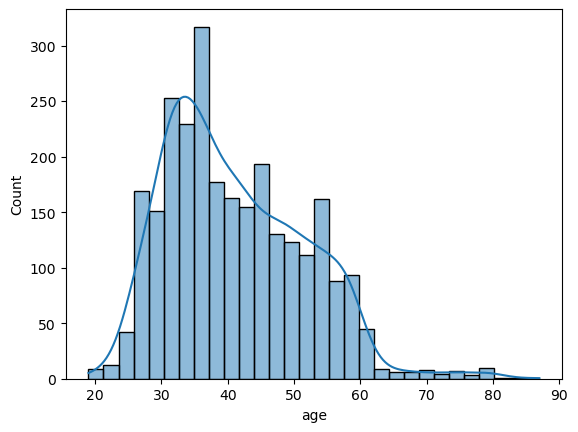

In [19]:
# Distribution plot of age
sns.histplot(data = data_train,
             x = 'age',
             kde = True)

In [20]:
# descriptive analysis with age vs loan
data_train['age'].groupby(data_train[variable_response]).describe()

,count,mean,std,min,25%,50%,75%,max
loan,,,,,,,,
0,2266.0,41.105472,10.636183,19.0,33.0,39.0,48.0,87.0
1,412.0,41.216019,9.877076,22.0,33.0,40.0,50.0,61.0


<Axes: xlabel='loan', ylabel='age'>

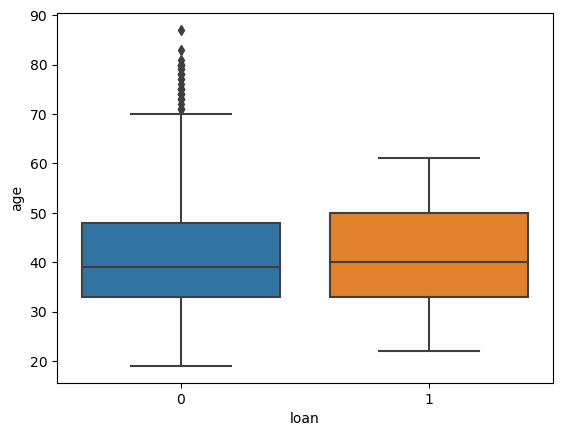

In [21]:
# Boxplot of age by  loan
sns.boxplot(data = data_train,
            x = variable_response,
            y = 'age')

we assume, nothing data outlier in the feature age

In [22]:
# Calculate Q1 and Q3
Q1_person_age = np.percentile(data_train['age'], 25)
Q3_person_age = np.percentile(data_train['age'], 75)

# Calculate IQR
IQR_person_age = Q3_person_age - Q1_person_age

# Calculate the thresholds
min_person_age = Q1_person_age - 1.5*IQR_person_age
max_person_age = Q3_person_age + 1.5*IQR_person_age

min_person_age, max_person_age

(9.0, 73.0)

From the IQR, debtors younger than 9.0 years and older than 73.0 years are outliers.

Assumptions:

The age regulation for the applicant is a minimum of 21 years old.
Applicants older than 40.5 to 55 may still be in productive age.
Therefore, we can define outliers from person_age variable with the following condition.

In [23]:
# find sum of data age outlier
adj_min_age = 21
adj_min_age = 45

outlier_adj_min = data_train['age'] < 21
outlier_adj_max = data_train['age'] > 55

adjust_outlier = np.where(outlier_adj_min |  outlier_adj_max) [0]

len(adjust_outlier)

287

In [24]:
# check invalid data
data_train[data_train['age'] < 21 ]

,age,job,marital,education,default,balance,housing,loan
2780,19,student,single,secondary,no,302,no,0
1900,19,student,single,unknown,no,0,no,0
1725,20,student,single,secondary,no,1191,no,0
13,20,student,single,secondary,no,502,no,0
503,19,student,single,primary,no,103,no,0


If we obtain an age less than 21, why are those who must not work and obtain student status still able to get a loan in the bank? We must investigate this.

**Summary**

- There seems to be no age difference between the default and non-default groups.
- Potential outliers over 70 years old come from the non-default group.
- The youngest debtor is 20 years old.
- Three-quarters of the debtors are up to 30 years old. The rest are over 30 years old.

**Business Insight:**
- Check the regulations to see whether we will accept applicants aged 20 years.
- If not, are debtors aged 20 still included in the sample?
- Check the maximum age limit for the applicant and adjust it to the tenor.

**Pre-processing Plan:**
- There are no missing values.
- The outliers will be grouped.

## Feature 2 : Balance
---

In [25]:
data['balance'].describe()

count     4464.000000
mean      1428.785394
std       3018.492489
min      -3313.000000
25%         75.000000
50%        452.000000
75%       1490.250000
max      71188.000000
Name: balance, dtype: float64

<Axes: xlabel='balance', ylabel='Count'>

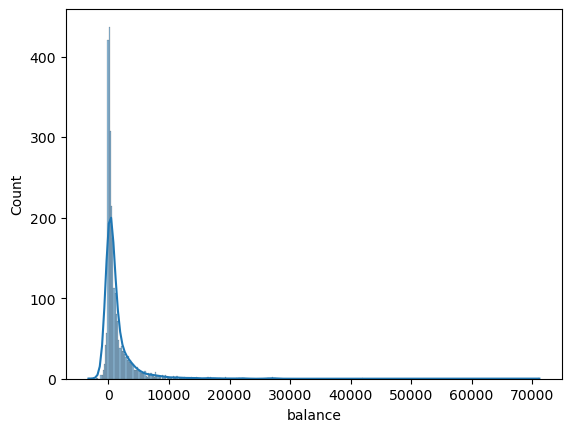

In [26]:
# Distribution plot of balance
sns.histplot(data = data_train,
             x = 'balance',
             kde = True)

In [27]:
# describtive loan vs balance
data_train['balance'].groupby(data_train[variable_response]).describe()

,count,mean,std,min,25%,50%,75%,max
loan,,,,,,,,
0,2266.0,1499.030450,3277.178196,-1746.0,85.25,477.0,1538.25,71188.0
1,412.0,927.747573,2449.252027,-3313.0,3.75,288.5,882.00,27069.0


In [28]:
# find data more than 10000
data_train[data_train['balance'] > 10000]

,age,job,marital,education,default,balance,housing,loan
2461,31,services,single,secondary,no,11386,yes,0
3608,44,management,married,tertiary,no,13893,no,0
922,67,blue-collar,married,secondary,no,16353,no,0
368,60,technician,single,primary,no,11262,no,0
4338,50,management,married,tertiary,no,19447,yes,1
339,51,self-employed,divorced,primary,no,10924,no,0
3289,58,management,married,tertiary,no,16264,no,0
2989,42,entrepreneur,married,tertiary,no,42045,no,0
4441,38,management,married,tertiary,no,12877,no,0
3332,31,management,married,tertiary,no,22546,yes,0


<Axes: xlabel='loan', ylabel='balance'>

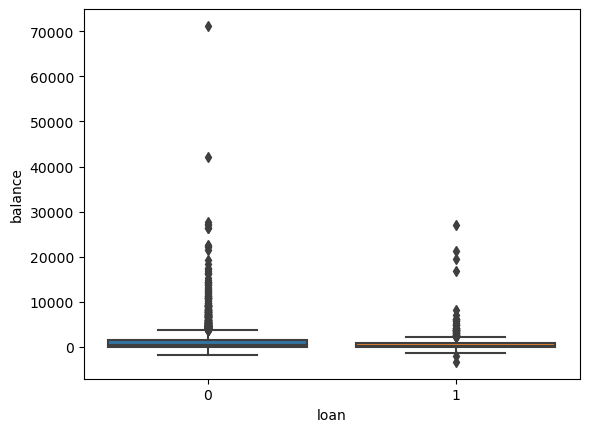

In [29]:
# Boxplot of person_income by response loan_status
sns.boxplot(data = data_train,
            x = variable_response,
            y = 'balance')

**Summary**
- The income data of the debtors is highly varied, and there may be outliers.

**Pre-processing Plan:**
- There are no missing values.
- There may be outliers:
  - Exclude the predictor `balance`.
  - Group the outliers as it is.

## Feature 3 : job
---

In [30]:
data_train['job'].value_counts(normalize=True)

blue-collar      0.207991
management       0.206497
technician       0.172143
admin.           0.111277
services         0.094473
retired          0.051158
self-employed    0.041822
entrepreneur     0.038835
unemployed       0.031740
housemaid        0.019791
student          0.016804
unknown          0.007468
Name: job, dtype: float64

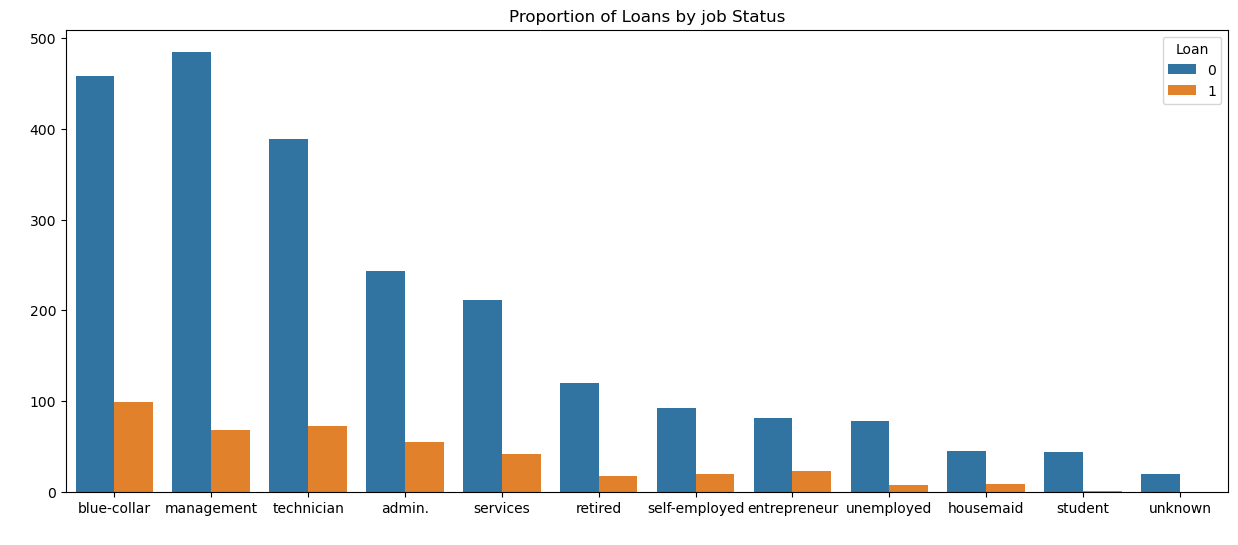

In [31]:
# Describe proportion of loan by 'marital'

# Calculate loan counts for each job status
loan_counts = data_train.groupby('job')['loan'].value_counts().unstack()

# Sort marital status categories based on the count of loans
order = loan_counts.sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(15, 6))
sns.countplot(data=data_train, x='job', hue='loan', order=order)
plt.title('Proportion of Loans by job Status')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(title='Loan')
plt.show()


Even though the count of debtors from blue-collar is higher.

Let's check the odds.

In [32]:
def calculate_odds(data, feature, variable):
    '''
    Function for calculating odds

    Parameters:
    -----------
    data : dataframe
        The dataset to be used.
    
    feature : str
        Name of the feature/column for which odds are to be calculated.
        
    variable : str
        Name of the target variable.
    
    Returns:
    --------
    crosstab : table contingency
        Dataframe with the crosstabs between the feature and the target variable.
    '''
    crosstab = pd.crosstab(data[feature],  
                           data[variable],
                           margins=True)
    # calculate odds
    crosstab['Odds'] = np.round((crosstab[1] / crosstab[0]), 2)

    # sort odds
    crosstab = crosstab.sort_values(by='Odds', ascending=False)
    
    return crosstab

In [33]:
odds_job = calculate_odds(data=data_train,
                          feature='job',
                          variable=variable_response)

odds_job

loan,0,1,All,Odds
job,,,,
entrepreneur,81,23,104,0.28
admin.,243,55,298,0.23
blue-collar,458,99,557,0.22
self-employed,92,20,112,0.22
services,211,42,253,0.20
technician,389,72,461,0.19
housemaid,45,8,53,0.18
All,2266,412,2678,0.18
management,485,68,553,0.14


Insight:
    probability job `entrepreneur` the higher can loan amount **34%** by odds

In [34]:
def relative_risk(odds_data, column_name_1, column_name_2):
    '''
    Calculate relative risk between pairs of categories.

    Parameters:
    -----------
    odds_data : pandas DataFrame
        A DataFrame with columns 'outcome' and 'exposure'. The rows represent the data.
    
    column_name_1 : str
        Name for the first column representing category 1.
        
    column_name_2 : str
        Name for the second column representing category 2.
    
    Returns:
    --------
    relative_risk_df : pandas DataFrame
        DataFrame containing calculated relative risk for each unique category pair.
    '''
    # Inisialisasi list untuk menyimpan baris DataFrame yang baru
    rows_to_append = []

    # List untuk menyimpan relative risk yang tidak valid
    invalid_risk = []

    # relative risk
    for i in range(len(odds_data)):
        for j in range(i+1, len(odds_data)):
            ods_1 = odds_data.index[i]
            ods_2 = odds_data.index[j]

            odds_yes_1 = odds_data.loc[ods_1, 1]
            odds_yes_2 = odds_data.loc[ods_2, 1]

            odds_all_1 = odds_data.loc[ods_1, 'All']
            odds_all_2 = odds_data.loc[ods_2, 'All']

            relative_risk = (odds_yes_1 / odds_all_1) / (odds_yes_2 / odds_all_2)
            
            # Periksa relative risk yang tidak valid
            if np.isinf(relative_risk) or np.isnan(relative_risk):
                invalid_risk.append(relative_risk)
            else:
                # Tambahkan baris baru ke list
                rows_to_append.append({column_name_1: ods_1, column_name_2: ods_2, 'Relative_Risk': relative_risk})

    # Buat DataFrame baru dari list baris yang ingin ditambahkan
    relative_risk_df = pd.DataFrame(rows_to_append)

    # Filtering the DataFrame to remove rows with 'All' in either 'Job_1' or 'Job_2'
    filtered_df = relative_risk_df[~((relative_risk_df[column_name_1] == 'All') | (relative_risk_df[column_name_2] == 'All'))]

    # Sorting the DataFrame based on relative risk
    relative_risk_df = filtered_df.sort_values(by='Relative_Risk', 
                                               ascending=False).reset_index(drop=True)

    return relative_risk_df

In [35]:
# call relative_risk by odds_job
relative_risk_job = relative_risk(odds_data = odds_job,
                                  column_name_1='job_1',
                                  column_name_2= 'job_2')
relative_risk_job

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_28676\2135079801.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  relative_risk = (odds_yes_1 / odds_all_1) / (odds_yes_2 / odds_all_2)


,job_1,job_2,Relative_Risk
0,entrepreneur,student,9.951923
1,admin.,student,8.305369
2,self-employed,student,8.035714
3,blue-collar,student,7.998205
4,services,student,7.470356
5,technician,student,7.028200
6,housemaid,student,6.792453
7,retired,student,5.583942
8,management,student,5.533454
9,unemployed,student,3.705882


Insight :

Entreprenuer have potential, if we look by calculate odds and the follow self-employed, then if we compare relative risk with other job, we obtain:

    Ententrepreneur with housemaid have potentional loan of 2.721088
    Ententrepreneur with housemaid have potentional loan of 2.721088
    Entrepreneur with unemployed have potentional loan of 2.295918
    
we assume entrepreneur and self employeed need money for growth the business,
    

## Feature 4 : Martial
---

In [36]:
data_train['marital'].value_counts(normalize=True)

married     0.607916
single      0.267737
divorced    0.124347
Name: marital, dtype: float64

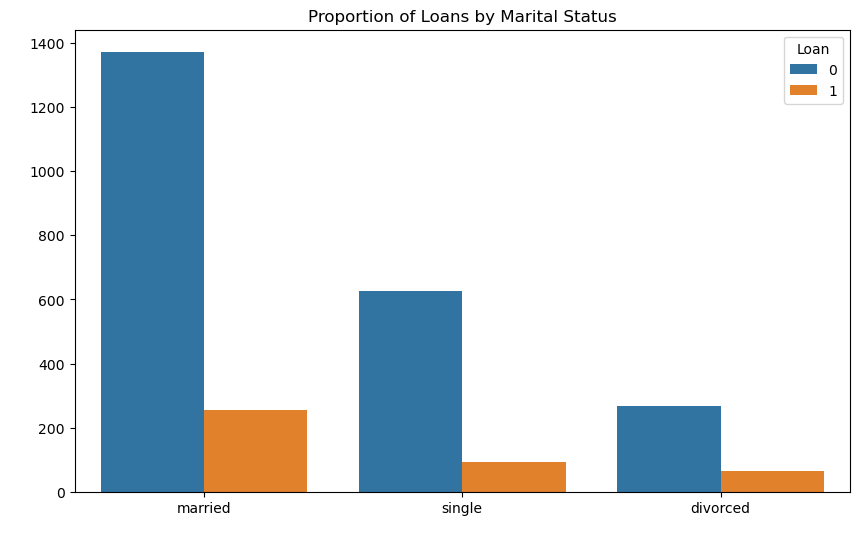

In [37]:
# Describe proportion of loan by 'marital'

# Calculate loan counts for each marital status
loan_counts = data_train.groupby('marital')['loan'].value_counts().unstack()

# Sort marital status categories based on the count of loans
order = loan_counts.sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='marital', hue='loan', order=order)
plt.title('Proportion of Loans by Marital Status')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(title='Loan')
plt.show()


In [38]:
# check odds by marital
odds_marital = calculate_odds(data=data_train,
                              feature='marital',
                              variable=variable_response)

odds_marital

loan,0,1,All,Odds
marital,,,,
divorced,268,65,333,0.24
married,1373,255,1628,0.19
All,2266,412,2678,0.18
single,625,92,717,0.15


divorced have high potentional borrow of 24%

We assume, maybe after a divorce, the person has to support the family extra because they live alone

In [39]:
# check relative risk

relative_risk_marital = relative_risk(odds_data = odds_marital,
                                      column_name_1= 'marital_1',
                                      column_name_2= 'marital_2')

relative_risk_marital

,marital_1,marital_2,Relative_Risk
0,divorced,single,1.521250
1,divorced,married,1.246187
2,married,single,1.220723


Insight:

Overall divorced have domination, the higher potential with single, we know  that. But what about when it comes to children? How does a child of a couple who are

## Feature 5 : Education
---

In [40]:
data_train['education'].value_counts(normalize=True)

secondary    0.518671
tertiary     0.290515
primary      0.151979
unknown      0.038835
Name: education, dtype: float64

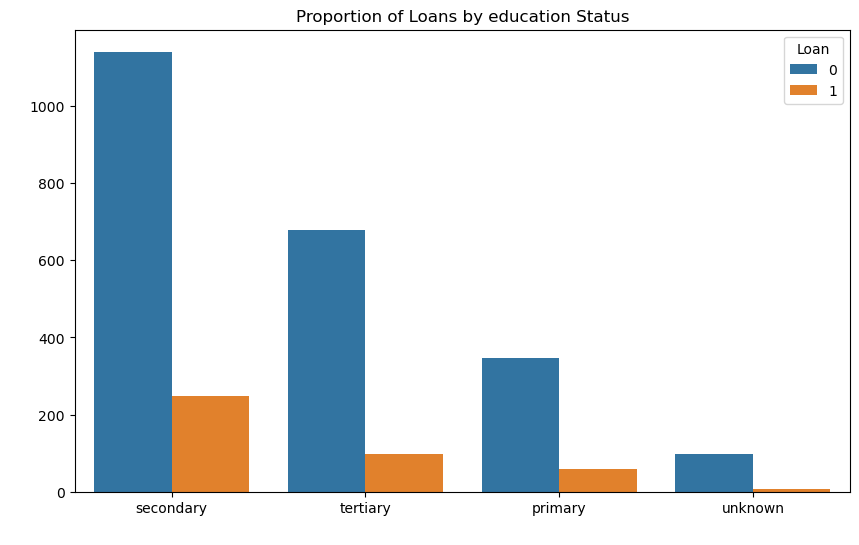

In [41]:
# Describe proportion of loan by 'marital'

# Calculate loan counts for each education status
loan_counts = data_train.groupby('education')['loan'].value_counts().unstack()

# Sort marital status categories based on the count of loans
order = loan_counts.sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='education', hue='loan', order=order)
plt.title('Proportion of Loans by education Status')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(title='Loan')
plt.show()


In [42]:
# check odds by education
odds_education = calculate_odds(data=data_train,
                              feature='education',
                              variable=variable_response)

odds_education

loan,0,1,All,Odds
education,,,,
secondary,1141,248,1389,0.22
All,2266,412,2678,0.18
primary,348,59,407,0.17
tertiary,679,99,778,0.15
unknown,98,6,104,0.06


we obtain secondary have odds higher (23%), we assume because, graduate of secondery level have income low, then need more money 

In [43]:
# check relative risk
relative_risk_education = relative_risk(odds_data = odds_education,
                                        column_name_1= 'education_1',
                                        column_name_2= 'education_2')

relative_risk_education

,education_1,education_2,Relative_Risk
0,secondary,unknown,3.094792
1,primary,unknown,2.512695
2,tertiary,unknown,2.205656
3,secondary,tertiary,1.403117
4,secondary,primary,1.231663
5,primary,tertiary,1.139205


We ignore unknown data, because we can not validation level education, we look `secondary` have probability the higher than  `primary` (1.46 times) and `teritary` (1.39 times).

## Feature 7 : Default 
---

In [44]:
# check odds by default
odds_default = calculate_odds(data=data_train,
                              feature='default',
                              variable=variable_response)

odds_default

loan,0,1,All,Odds
default,,,,
yes,31,14,45,0.45
no,2235,398,2633,0.18
All,2266,412,2678,0.18


We know that the person who has defaulted, the potential loan is high (52%), despite the default count not being higher than no, we must consider this.

In [45]:
# check relative risk
relative_risk_default = relative_risk(odds_data = odds_default,
                                        column_name_1= 'default_yes',
                                        column_name_2= 'default_no')

relative_risk_default

,default_yes,default_no,Relative_Risk
0,yes,no,2.05818


`default` has a relatively higher default risk compared to not `default` by 2.27 times.

## Feature 8 : Housing
---

In [46]:
# check odds by housing
odds_house = calculate_odds(data=data_train,
                              feature='housing',
                              variable=variable_response)

odds_house

loan,0,1,All,Odds
housing,,,,
no,975,178,1153,0.18
yes,1291,234,1525,0.18
All,2266,412,2678,0.18


We obtain that, installment housing or not, is not high different.

In [47]:
# check relative risk
relative_risk_housing = relative_risk(odds_data = odds_house,
                                      column_name_1= 'house_yes',
                                      column_name_2= 'house_no')

relative_risk_housing

,house_yes,house_no,Relative_Risk
0,no,yes,1.006108


The person who has an installment house has 1.11 times the potential of having no installment. We assume that because the person does not have dependents to emit more money or not, the main factor depends on the loan in the bank.

## Check Correlation
----

We'll calculate the Pearson correlation between numerical predictors to see whether we have multicollinearity in training set.

First, define the list of numerical and categorical predictors.

### Define Numerical and Categorical Features
---

In [48]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 992 to 3810
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2678 non-null   int64 
 1   job        2678 non-null   object
 2   marital    2678 non-null   object
 3   education  2678 non-null   object
 4   default    2678 non-null   object
 5   balance    2678 non-null   int64 
 6   housing    2678 non-null   object
 7   loan       2678 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 188.3+ KB


In [49]:
# cat columns
cat_columns = ['job', 'marital', 
               'education', 'default',
               'housing']

# num columns
num_columns = ['balance', 'age']

### Check Multicollinearity
---
Next, calculate the Pearson correlation coefficient between numerical predictors.

In [50]:
data_train_corr = data_train[num_columns].corr(method = 'pearson')

data_train_corr

,balance,age
balance,1.000000,0.084845
age,0.084845,1.000000


`balance` with `age` have low correlation

We may have multicollinearity between `balance` and `age`.
- We will perform model selection or
- Exclude `balance`.

we want to know about correlation between two variables or more variable, we try to use model ols
1. Chi-square
2. Anova Test

### 1. Chi-Square

In [51]:
from scipy.stats import chi2_contingency

def chi_square(target_column, data):
    '''
    Function for check chi_square between columns category with target

    Paramaters:
    -----------
    target_column : str
        Target name column  in dataframe
    
    data : pd dataframe
        Data for check chi-square
    
    Return:
    -------
        None
    '''
    
    # initial for save significant columns (p_value < 0.05)
    significant = []

    for i in data.columns:
        if i != target_column:  # Skip target column

            # Create contingency table from data
            contingency_table = pd.crosstab(data[target_column], data[i])

            # chi-square test
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

            # Add the columns have  a significant association to the list
            if p_val < 0.05:
                significant.append(i)
                print(f'Significant column {target_column} vs {i}, chi2-statistic: {chi2_stat}')
    

In [52]:
significant_column = chi_square(target_column = 'loan', data = data_train)

Significant column loan vs job, chi2-statistic: 27.003531604417574
Significant column loan vs marital, chi2-statistic: 8.06176455943477
Significant column loan vs education, chi2-statistic: 18.37020814598892
Significant column loan vs default, chi2-statistic: 7.510290715740772


Based on chi2, we determine that `loan` vs `job` have a strong and significant relationship; we assume income a person obtains from work.

### 2. Anova Two-way

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create formula
formula = 'loan ~ C(age) + C(job) + C(marital) + C(education) + C(default) + C(balance) + C(housing)'

# Create model OLS
model = ols(formula, data=data_train).fit()

# Do Anova Analysis
anova_table = sm.stats.anova_lm(model, typ=2)

In [54]:
# Tampilkan kolom yang memiliki nilai p-value kurang dari 0.05
significant_columns = anova_table[anova_table['PR(>F)'] < 0.05]

significant_columns

,sum_sq,df,F,PR(>F)
C(default),0.524771,1.0,3.952007,0.047106


Result Anova test : 

From the 7 features we obtain, `education` and `default` have a significant relationship with `loan`, and `education` has a higher distribution than `default`.

# **Initial Characteristic Analysis**
---

We need binning data age for more analysis; we start binning at more than 21 years old.

In [55]:
# Create a function for binning the numerical predictor
def create_binning(data, feature_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    feature_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.

    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[feature_label + "_bin"] = pd.qcut(data[feature_label],
                                             q = num_of_bins)

    return data

In [56]:
# copy data
data_train_copy = data_train.copy()

data_train_copy

,age,job,marital,education,default,balance,housing,loan
992,39,blue-collar,married,primary,no,879,yes,0
1982,61,blue-collar,married,primary,no,625,yes,0
3240,43,technician,single,secondary,no,34,no,0
522,43,admin.,divorced,secondary,no,738,yes,0
1811,44,admin.,single,secondary,no,-101,yes,0
...,...,...,...,...,...,...,...,...
3904,32,admin.,married,secondary,no,76,yes,0
30,68,retired,divorced,secondary,no,4189,no,0
1836,31,blue-collar,single,primary,no,2488,yes,0
3115,39,self-employed,married,tertiary,no,585,yes,0


In [57]:
# Filter data where age is over 21, job is not 'unknown', and drop columns related to loans
binning_data = data_train_copy[(data_train_copy['age'] > 21) & (data_train_copy['job'] != 'unknown') & (data_train_copy['education'] != 'unknown')]
binning_data = binning_data.drop(columns=['loan'])

# Select columns with data type 'int'
binning_data = binning_data.select_dtypes(include=['int'])


In [58]:
# binning data
for feature_columns in binning_data:
    data_train_binning = create_binning(data = data_train_copy,
                                        feature_label=feature_columns,
                                        num_of_bins=4)

data_train_binning.T

,992,1982,3240,522,1811,764,4295,2375,2716,4192,...,1316,3080,1203,853,851,3904,30,1836,3115,3810
age,39,61,43,43,44,28,30,26,59,29,...,30,33,48,48,46,32,68,31,39,40
job,blue-collar,blue-collar,technician,admin.,admin.,services,self-employed,unemployed,housemaid,management,...,management,services,retired,technician,blue-collar,admin.,retired,blue-collar,self-employed,blue-collar
marital,married,married,single,divorced,single,married,single,single,married,single,...,married,married,married,divorced,married,married,divorced,single,married,married
education,primary,primary,secondary,secondary,secondary,secondary,tertiary,secondary,tertiary,secondary,...,tertiary,secondary,primary,tertiary,secondary,secondary,secondary,primary,tertiary,primary
default,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
balance,879,625,34,738,-101,0,901,622,0,584,...,3134,478,5173,113,5,76,4189,2488,585,3658
housing,yes,yes,no,yes,yes,yes,yes,no,no,yes,...,yes,no,yes,no,no,yes,no,yes,yes,yes
loan,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
age_bin,"(33.0, 39.0]","(49.0, 87.0]","(39.0, 49.0]","(39.0, 49.0]","(39.0, 49.0]","(18.999, 33.0]","(18.999, 33.0]","(18.999, 33.0]","(49.0, 87.0]","(18.999, 33.0]",...,"(18.999, 33.0]","(18.999, 33.0]","(39.0, 49.0]","(39.0, 49.0]","(39.0, 49.0]","(18.999, 33.0]","(49.0, 87.0]","(18.999, 33.0]","(33.0, 39.0]","(39.0, 49.0]"
balance_bin,"(442.5, 1436.75]","(442.5, 1436.75]","(-3313.001, 70.25]","(442.5, 1436.75]","(-3313.001, 70.25]","(-3313.001, 70.25]","(442.5, 1436.75]","(442.5, 1436.75]","(-3313.001, 70.25]","(442.5, 1436.75]",...,"(1436.75, 71188.0]","(442.5, 1436.75]","(1436.75, 71188.0]","(70.25, 442.5]","(-3313.001, 70.25]","(70.25, 442.5]","(1436.75, 71188.0]","(1436.75, 71188.0]","(442.5, 1436.75]","(1436.75, 71188.0]"


In [59]:
# Check for missing values
data_train_binning.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
age_bin        0
balance_bin    0
dtype: int64

### **WoE and IV**
---  
To assess the strength of each characteristic individually as a predictor of the credit performance.

First, create a contingency table/crosstab for all predictors: numerical and categorical predictors.

In [60]:
def crosstab_list(data, num_columns, cat_columns, variable_response):
    """
    Function for crosstab data numeric and category

    Paramaters:
    -----------
    data : pd.Dataframe
        Input data after binning
    
    num_columns : list
        list of numeric columns name
    
    cat_columns : list
        list of category columns name
    
    variable_response : str
        name of column target

    Returns:
    --------
    crosstab_list : list
        result of crosstab
    """
    # Define the initial empty list for numerical columns
    crosstab_num = []

    # Generate contingency tables for numerical columns
    for column in num_columns:
        crosstab = pd.crosstab(data[column + "_bin"], data[variable_response], margins=True)
        crosstab_num.append(crosstab)

    # Define the initial empty list for categorical columns
    crosstab_cat = []

    # Generate contingency tables for categorical columns
    for column in cat_columns:
        crosstab = pd.crosstab(data[column], data[variable_response], margins=True)
        crosstab_cat.append(crosstab)

    # Concatenate the lists
    crosstab_list = crosstab_num + crosstab_cat

    return crosstab_list

In [61]:
# Put all two in a crosstab_list
crosstab_list_train = crosstab_list(data = data_train_binning,  num_columns = num_columns,
                                    cat_columns = cat_columns, variable_response = 'loan')

crosstab_list_train

[loan                   0    1   All
 balance_bin                        
 (-3313.001, 70.25]   541  129   670
 (70.25, 442.5]       556  113   669
 (442.5, 1436.75]     573   96   669
 (1436.75, 71188.0]   596   74   670
 All                 2266  412  2678,
 loan               0    1   All
 age_bin                        
 (18.999, 33.0]   625  117   742
 (33.0, 39.0]     541   76   617
 (39.0, 49.0]     596  111   707
 (49.0, 87.0]     504  108   612
 All             2266  412  2678,
 loan              0    1   All
 job                           
 admin.          243   55   298
 blue-collar     458   99   557
 entrepreneur     81   23   104
 housemaid        45    8    53
 management      485   68   553
 retired         120   17   137
 self-employed    92   20   112
 services        211   42   253
 student          44    1    45
 technician      389   72   461
 unemployed       78    7    85
 unknown          20    0    20
 All            2266  412  2678,
 loan         0    1   All


Next, calculate the WOE and IV for each crosstab.

- Weight of Evidence (WoE) — measures the strength of each attribute.

$$
\begin{align*}
W_i &= \ln ( \% \text{Good} / \% \text{Bad} ) \\
W_i &= \ln \left ( \left ( \frac{N_i}{\sum N} \right ) / \left ( \frac{P_i}{\sum P} \right )\right ) \\
\end{align*}
$$

- Information Value (IV) — measures the total strength of the characteristic.

$$
\begin{align*}
IV &= \sum_{i=1}^{n} ( \% \text{Good} - \% \text{Bad} ) \times W_i \\
IV &= \sum_{i=1}^{n}\left [ \left ( \frac{N_i}{\sum N} - \frac{P_i}{\sum P} \right ) \times W_i \right ] \\
\end{align*}
$$

In [62]:
def calculate_woe_iv(crosstab_list):
    """
    Function for calculate woe and iv

    Parameters:
    -----------
    crosstab_list : list
        Data crosstab after binning
    
    Returns:
    --------
    WOE_list : list
        result of calculate woe 
    
    IV_list : list
        result of calculate iv
    """
    # Define the initial lists for WOE and IV
    WOE_list = []
    IV_list = []

    # Perform the algorithm for all crosstab
    for crosstab in crosstab_list:
        # Calculate % Good
        crosstab['p_good'] = crosstab[0] / crosstab[0]['All']

        # Calculate % Bad
        crosstab['p_bad'] = crosstab[1] / crosstab[1]['All']

        # Calculate the WOE
        crosstab['WOE'] = np.log(crosstab['p_good'] / crosstab['p_bad'])

        # Calculate the contribution value for IV
        crosstab['contribution'] = (crosstab['p_good'] - crosstab['p_bad']) * crosstab['WOE']

        # Calculate the IV
        IV = crosstab['contribution'][:-1].sum()

        add_IV = {'Characteristic': crosstab.index.name,
                  'Information Value': IV}

        WOE_list.append(crosstab)
        IV_list.append(add_IV)

    return WOE_list, IV_list

In [63]:
WOE_list_train, IV_list_train = calculate_woe_iv(crosstab_list = crosstab_list_train)

In [64]:
IV_list_train

[{'Characteristic': 'balance_bin', 'Information Value': 0.05681914942516701},
 {'Characteristic': 'age_bin', 'Information Value': 0.020918723423597275},
 {'Characteristic': 'job', 'Information Value': inf},
 {'Characteristic': 'marital', 'Information Value': 0.022749770812776814},
 {'Characteristic': 'education', 'Information Value': 0.06261845681631499},
 {'Characteristic': 'default', 'Information Value': 0.018891559063148194},
 {'Characteristic': 'housing', 'Information Value': 1.2704951073572525e-05}]

In [65]:
WOE_list_train

[loan                   0    1   All    p_good     p_bad       WOE  \
 balance_bin                                                         
 (-3313.001, 70.25]   541  129   670  0.238747  0.313107 -0.271141   
 (70.25, 442.5]       556  113   669  0.245366  0.274272 -0.111368   
 (442.5, 1436.75]     573   96   669  0.252868  0.233010  0.081789   
 (1436.75, 71188.0]   596   74   670  0.263019  0.179612  0.381427   
 All                 2266  412  2678  1.000000  1.000000  0.000000   
 
 loan                contribution  
 balance_bin                       
 (-3313.001, 70.25]      0.020162  
 (70.25, 442.5]          0.003219  
 (442.5, 1436.75]        0.001624  
 (1436.75, 71188.0]      0.031814  
 All                     0.000000  ,
 loan               0    1   All    p_good     p_bad       WOE  contribution
 age_bin                                                                    
 (18.999, 33.0]   625  117   742  0.275816  0.283981 -0.029170      0.000238
 (33.0, 39.0]     541   

In [66]:
def create_woe_table(crosstab_list):
    """
    Creates a table summarizing the WOE (Weight of Evidence) values.

    Parameters:
    -----------
    crosstab_list : list 
      A list of contingency tables.

    Returns:
    --------
    WOE_table :  DataFrame 
      A DataFrame summarizing the WOE values with columns:
        - Characteristic: The characteristic name.
        - Attribute: The attribute name.
        - WOE: The corresponding WOE value.
    """
    # Create initial table to summarize the WOE values
    WOE_table = pd.DataFrame({'Characteristic': [],
                              'Attribute': [],
                              'WOE': []})

    for i in range(len(crosstab_list)):
        # Define crosstab and reset index
        crosstab = crosstab_list[i].reset_index()

        # Save the characteristic name
        char_name = crosstab.columns[0]

        # Only use two columns (Attribute name and its WOE value)
        # Drop the last row (average/total WOE)
        crosstab = crosstab.iloc[:-1, [0, -2]]
        crosstab.columns = ['Attribute', 'WOE']

        # Add the characteristic name in a column
        crosstab['Characteristic'] = char_name

        WOE_table = pd.concat((WOE_table, crosstab), axis=0)

    # Reorder the column
    WOE_table.columns = ['Characteristic', 'Attribute', 'WOE']

    return WOE_table

In [67]:
WOE_table = create_woe_table(crosstab_list = crosstab_list_train)

WOE_table

,Characteristic,Attribute,WOE
0,balance_bin,"(-3313.001, 70.25]",-0.271141
1,balance_bin,"(70.25, 442.5]",-0.111368
2,balance_bin,"(442.5, 1436.75]",0.081789
3,balance_bin,"(1436.75, 71188.0]",0.381427
0,age_bin,"(18.999, 33.0]",-0.029170
1,age_bin,"(33.0, 39.0]",0.257938
2,age_bin,"(39.0, 49.0]",-0.024038
3,age_bin,"(49.0, 87.0]",-0.164303
0,job,admin.,-0.219020
1,job,blue-collar,-0.172999


The rule of thumb regarding IV:
- Less than 0.02 : generally unpredictive
- 0.02 to 0.1 : weak
- 0.1 to 0.3 : medium
- 0.3+ : strong

In [68]:
# Put all IV in the table
IV_table = pd.DataFrame(IV_list_train)
IV_table

,Characteristic,Information Value
0,balance_bin,0.056819
1,age_bin,0.020919
2,job,inf
3,marital,0.022750
4,education,0.062618
5,default,0.018892
6,housing,0.000013


In [69]:
# Define the predictive power of each characteristic
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Unpredictive')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.3:
    strength.append('Medium')
  elif iv >= 0.3 and iv < 0.5:
    strength.append('Strong')
  else:
    strength.append('Very strong')

# Assign the strength to each characteristic
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by='Information Value', 
                     ascending=False).reset_index(drop=True)

,Characteristic,Information Value,Strength
0,job,inf,Very strong
1,education,0.062618,Weak
2,balance_bin,0.056819,Weak
3,marital,0.022750,Weak
4,age_bin,0.020919,Weak
5,default,0.018892,Unpredictive
6,housing,0.000013,Unpredictive


From the IV table:
- We have 2 unpredictive, 3 weak, and 1 Medium characteristics.
- Be careful for 1 very strong characteristics: should be checked for overpredicting.

Before performing model selection in modeling, we will check the independency between each characteristic with the response variable `loan`.

Before that, we'll check the logical trend and operational/business considerations from the WOE in each characteristic.

### **Check Logical Trend and Business Consideration**
---

In grouped scorecards, the attribute strengths must also be in a logical order, and make operational sense.

In [70]:
# Create a funtion to plot the WOE
def plot_WOE(crosstab):
  """
  Function to plot the WOE trend.

  Parameters
  ----------
  crosstab : DataFrame
    The cross tabulation of the characteristic.

  """
  # Define the plot size
  plt.figure(figsize = (8,4))

  # Plot the WOE
  sns.pointplot(x = crosstab.T.columns,
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)


**Characteristic 1: age**

In [71]:
crosstab_age_bin = crosstab_list_train[1]

crosstab_age_bin

loan,0,1,All,p_good,p_bad,WOE,contribution
age_bin,,,,,,,
"(18.999, 33.0]",625,117,742,0.275816,0.283981,-0.029170,0.000238
"(33.0, 39.0]",541,76,617,0.238747,0.184466,0.257938,0.014001
"(39.0, 49.0]",596,111,707,0.263019,0.269417,-0.024038,0.000154
"(49.0, 87.0]",504,108,612,0.222418,0.262136,-0.164303,0.006526
All,2266,412,2678,1.000000,1.000000,0.000000,0.000000


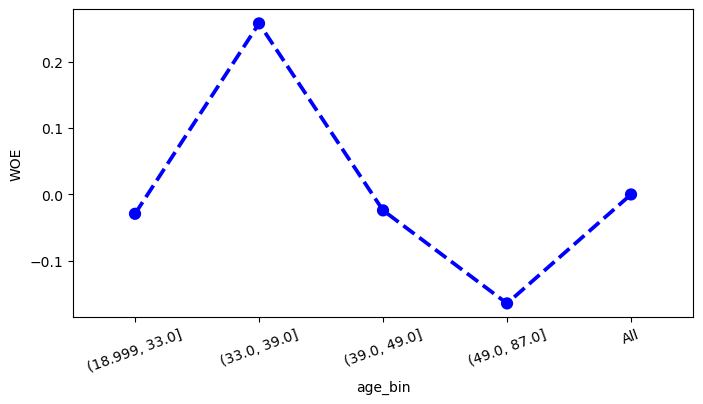

In [72]:
# Plot the WOE
plot_WOE(crosstab_age_bin)

- Older debtors tend to be generally at higher risk than younger debtors.
- This is make sense with assumptions:
  - The older debtors many depend on the family and in the 60 to 87 not productive.
  - The younger debtors do not depend, especially in the range of 21 to 25.

**Characteristic 2: balance**

In [73]:
crosstab_balance_bin = crosstab_list_train[0]

crosstab_balance_bin

loan,0,1,All,p_good,p_bad,WOE,contribution
balance_bin,,,,,,,
"(-3313.001, 70.25]",541,129,670,0.238747,0.313107,-0.271141,0.020162
"(70.25, 442.5]",556,113,669,0.245366,0.274272,-0.111368,0.003219
"(442.5, 1436.75]",573,96,669,0.252868,0.233010,0.081789,0.001624
"(1436.75, 71188.0]",596,74,670,0.263019,0.179612,0.381427,0.031814
All,2266,412,2678,1.000000,1.000000,0.000000,0.000000


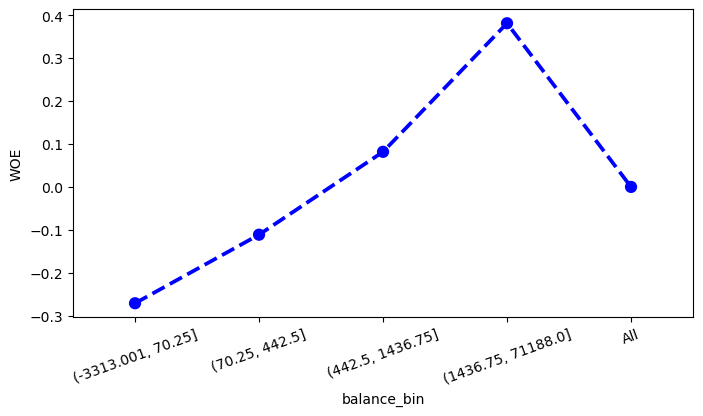

In [74]:
# Plot the WOE
plot_WOE(crosstab_balance_bin)

- Debtors with higher balance tend to be generally of a lower risk of default.

**Characteristic 3: Job**

In [75]:
crosstab_job_bin = crosstab_list_train[2]

crosstab_job_bin

loan,0,1,All,p_good,p_bad,WOE,contribution
job,,,,,,,
admin.,243,55,298,0.107237,0.133495,-0.219020,0.005751
blue-collar,458,99,557,0.202118,0.240291,-0.172999,0.006604
entrepreneur,81,23,104,0.035746,0.055825,-0.445793,0.008951
housemaid,45,8,53,0.019859,0.019417,0.022473,0.000010
management,485,68,553,0.214034,0.165049,0.259893,0.012731
retired,120,17,137,0.052957,0.041262,0.249530,0.002918
self-employed,92,20,112,0.040600,0.048544,-0.178692,0.001419
services,211,42,253,0.093116,0.101942,-0.090560,0.000799
student,44,1,45,0.019417,0.002427,2.079442,0.035330


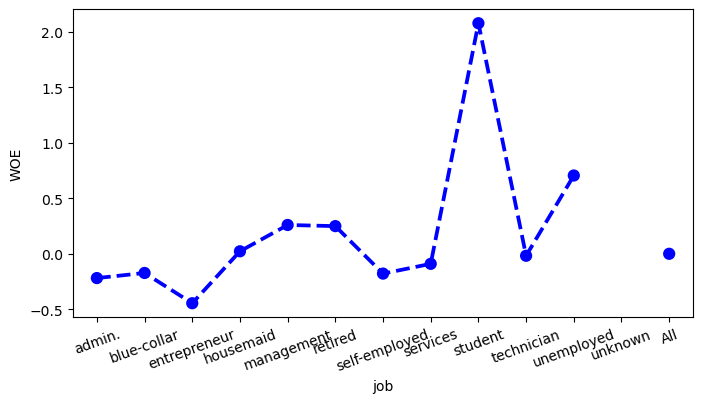

In [76]:
# Plot the WOE
plot_WOE(crosstab_job_bin)

We can recommend a `loan` to blue-collar, management, housemaid, retired, unemployed, and technician.
Because the job's income is stable, the risk of default is low.

**Characteristic 4: marital**

In [77]:
crosstab_marital_bin = crosstab_list_train[3]

crosstab_marital_bin

loan,0,1,All,p_good,p_bad,WOE,contribution
marital,,,,,,,
divorced,268,65,333,0.118270,0.157767,-0.288148,0.011381
married,1373,255,1628,0.605914,0.618932,-0.021258,0.000277
single,625,92,717,0.275816,0.223301,0.211215,0.011092
All,2266,412,2678,1.000000,1.000000,0.000000,0.000000


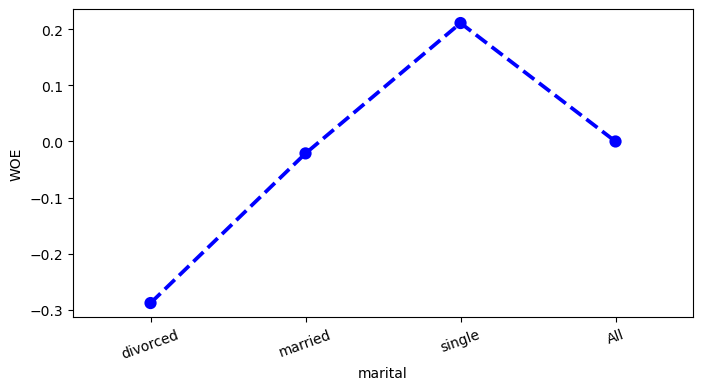

In [78]:
# Plot the WOE
plot_WOE(crosstab_marital_bin)

We can recommend to single person, we assume because single person not high depends

**Characteristic 5 : education**

In [79]:
crosstab_education_bin = crosstab_list_train[4]

crosstab_education_bin

loan,0,1,All,p_good,p_bad,WOE,contribution
education,,,,,,,
primary,348,59,407,0.153575,0.143204,0.069917,0.000725
secondary,1141,248,1389,0.503530,0.601942,-0.178516,0.017568
tertiary,679,99,778,0.299647,0.240291,0.220753,0.013103
unknown,98,6,104,0.043248,0.014563,1.088460,0.031222
All,2266,412,2678,1.000000,1.000000,0.000000,0.000000


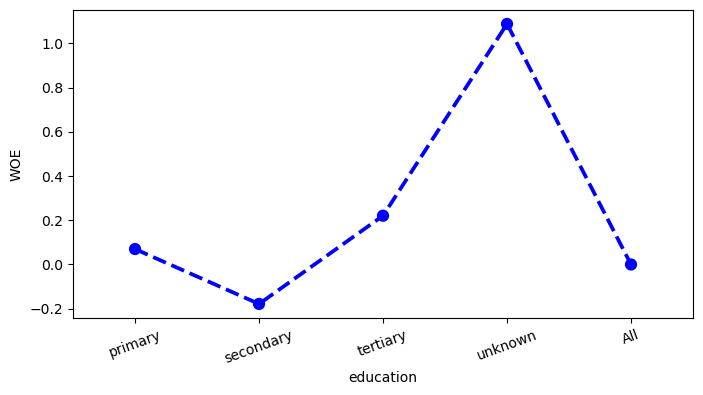

In [80]:
# Plot the WOE
plot_WOE(crosstab_education_bin)

We can recomend to Primary and teritary, because:

- Primary Education:

    - High job stability.
    - Low financial burdens.
    - Potential for stable future income.

- Tertiary Education:

    - High potential for future income.
    - Ability to repay loans with promising career prospects.
    - Better financial discipline due to the commitment and organization required for higher education.

**Characteristic 6 : default**

In [81]:
crosstab_default_bin = crosstab_list_train[5]

crosstab_default_bin

loan,0,1,All,p_good,p_bad,WOE,contribution
default,,,,,,,
no,2235,398,2633,0.98632,0.966019,0.020796,0.000422
yes,31,14,45,0.01368,0.033981,-0.909818,0.018469
All,2266,412,2678,1.00000,1.000000,0.000000,0.000000


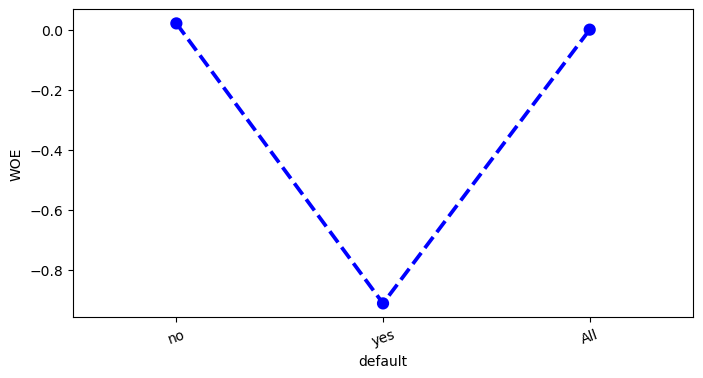

In [82]:
# Plot the WOE
plot_WOE(crosstab_default_bin)

It makes sense, why should we give a loan to someone who will eventually default?

**Characteristic 7 : housing**

In [83]:
crosstab_housing_bin = crosstab_list_train[6]

crosstab_housing_bin

loan,0,1,All,p_good,p_bad,WOE,contribution
housing,,,,,,,
no,975,178,1153,0.430274,0.432039,-0.004094,0.000007
yes,1291,234,1525,0.569726,0.567961,0.003103,0.000005
All,2266,412,2678,1.000000,1.000000,0.000000,0.000000


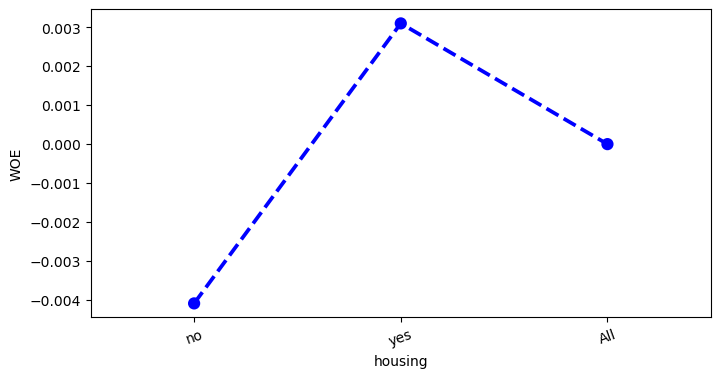

In [84]:
# Plot the WOE
plot_WOE(crosstab_housing_bin)

It makes sense, why should we give a loan to someone who will eventually house installment?

it's high risk, because if the person fails to pay back, you have to cover all those costs.

### Characteristic Tuning
---

First, create a function to calculate WOE and IV from the tuned characteristic.

What if we create 8 bins from `loan`?

In [85]:
# Filter data where age is over 21, job is not 'unknown', and drop columns related to loans
binning_data_tuned = data_train[(data_train['age'] > 21) & (data_train['job'] != 'unknown') & (data_train['education'] != 'unknown')]
binning_data_tuned = binning_data_tuned.drop(columns=['loan'])

# Select columns with data type 'int'
binning_data_tuned = binning_data_tuned.select_dtypes(include=['int'])

In [86]:
# Create a function for binning the numerical predictor
def create_binning_tuned(data, feature_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    feature_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.

    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[feature_label + "_tuned"] = pd.qcut(data[feature_label],
                                             q = num_of_bins)

    return data

In [87]:
def WOE_IV_tuned(data, num_columns, variable_response, num_of_bins):
    '''
    Function to obtain WOE (Weight of Evidence) and IV (Information Value).
    
    Parameters:
    -----------
    data : DataFrame
        Input DataFrame from training data.
    
    num_columns : list
        List of columns to check their contribution and perform binning.
    
    variable_response : str
        Target column to check contribution.
    
    num_of_bins : int
        Number of bins for binning the data.
    
    Returns:
    --------
    IV_list_tuned : list of dicts
        List containing dictionaries with the characteristic name and its Information Value.
    
    WOE_list_tuned : list
        List containing the Weight of Evidence values for each characteristic.
    '''
    # Define an initial empty list
    crosstab_num_tuned = []

    # Binning the data
    for column in num_columns:
        data[column + "_tuned"] = pd.qcut(data[column], q=num_of_bins)
            
        # Create a contingency table
        crosstab = pd.crosstab(data[column + "_tuned"], data[variable_response], margins=True)

        # Append to the list
        crosstab_num_tuned.append(crosstab)

    # Define the initial list for WOE
    WOE_list_tuned = []

    # Define the initial list for IV
    IV_list_tuned = []

    # Perform the algorithm for all crosstab
    for i, crosstab in enumerate(crosstab_num_tuned):
        # Calculate % Good
        crosstab['p_good'] = crosstab[0] / crosstab.loc['All', 0]

        # Calculate % Bad
        crosstab['p_bad'] = crosstab[1] / crosstab.loc['All', 1]

        # Calculate the WOE
        crosstab['WOE'] = np.log(crosstab['p_good'] / crosstab['p_bad'])

        # Calculate the contribution value for IV
        crosstab['contribution'] = (crosstab['p_good'] - crosstab['p_bad']) * crosstab['WOE']

        # Calculate the IV
        IV = crosstab['contribution'][:-1].sum()

        add_IV = {'Characteristic': num_columns[i], 'Information Value': IV}

        WOE_list_tuned.append(crosstab)
        IV_list_tuned.append(add_IV)

    return IV_list_tuned, WOE_list_tuned

#### **Tuning 8 Bins**

In [88]:
# Call function WOE_IV_tuned
IV_list_tuned_8, WOE_list_tuned = WOE_IV_tuned(data = data_train,
                                            variable_response = 'loan',
                                            num_columns = num_columns,
                                            num_of_bins=8)

**Characteristic Tuning 8 Bins : Balance**

In [89]:
# check balance 
crosstab_balance_tuned = WOE_list_tuned[0]

crosstab_balance_tuned

loan,0,1,All,p_good,p_bad,WOE,contribution
balance_tuned,,,,,,,
"(-3313.001, 0.0]",338,98,436,0.149162,0.237864,-0.466670,0.041395
"(0.0, 70.25]",203,31,234,0.089585,0.075243,0.174471,0.002502
"(70.25, 228.0]",282,54,336,0.124448,0.131068,-0.051825,0.000343
"(228.0, 442.5]",274,59,333,0.120918,0.143204,-0.169157,0.003770
"(442.5, 786.125]",277,58,335,0.122242,0.140777,-0.141174,0.002617
"(786.125, 1436.75]",296,38,334,0.130627,0.092233,0.348025,0.013362
"(1436.75, 3171.625]",294,41,335,0.129744,0.099515,0.265260,0.008019
"(3171.625, 71188.0]",302,33,335,0.133274,0.080097,0.509171,0.027076
All,2266,412,2678,1.000000,1.000000,0.000000,0.000000


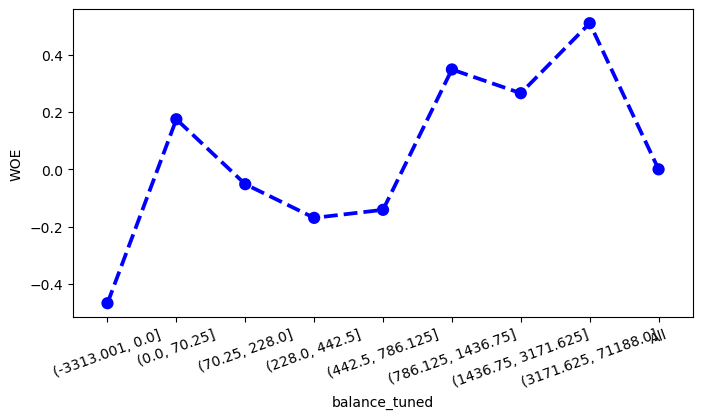

In [90]:
# Plot the WOE
plot_WOE(crosstab_balance_tuned)

with 4 bins we obtain column balance is `0.05495281015065605` what if 8 bins?

In [91]:
# check IV_list balance
IV_list_tuned_8[0]

{'Characteristic': 'balance', 'Information Value': 0.09908369122520623}

We see, binning_4 0.05 less than binnning_8 0.09, but is still weak category

**Characteristic Tuning 8 bins : Age**

In [92]:
# check age 
crosstab_age_tuned = WOE_list_tuned[1]

crosstab_age_tuned

loan,0,1,All,p_good,p_bad,WOE,contribution
age_tuned,,,,,,,
"(18.999, 30.0]",329,54,383,0.145190,0.131068,0.102326,0.001445
"(30.0, 33.0]",296,63,359,0.130627,0.152913,-0.157523,0.003511
"(33.0, 36.0]",294,54,348,0.129744,0.131068,-0.010152,0.000013
"(36.0, 39.0]",247,22,269,0.109003,0.053398,0.713598,0.039679
"(39.0, 43.0]",267,51,318,0.117829,0.123786,-0.049325,0.000294
"(43.0, 49.0]",329,60,389,0.145190,0.145631,-0.003035,0.000001
"(49.0, 55.0]",261,69,330,0.115181,0.167476,-0.374334,0.019576
"(55.0, 87.0]",243,39,282,0.107237,0.094660,0.124752,0.001569
All,2266,412,2678,1.000000,1.000000,0.000000,0.000000


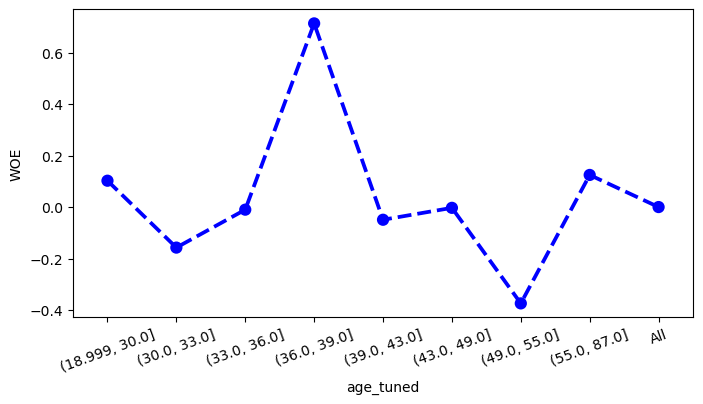

In [93]:
# Plot the WOE
plot_WOE(crosstab_age_tuned)

with 4 bins we obtain column balance is `0.005201756594844781` what if 8 bins?

In [94]:
# check IV_list age
IV_list_tuned_8[1]

{'Characteristic': 'age', 'Information Value': 0.0660882950643756}

We see, binning_4 0.005 less than binnning_8 0.05, but is still weak category

Next we can try for 12 bins

#### **Tuning 12 Bins**

In [95]:
# Call function WOE_IV_tuned
IV_list_tuned_12, WOE_list_tuned_12 = WOE_IV_tuned(data = data_train,
                                                   variable_response = 'loan',
                                                   num_columns = num_columns,
                                                   num_of_bins=12)

**Characteristic Tuning 12 Bins : Balance**

In [96]:
# check balance 
crosstab_balance_tuned12 = WOE_list_tuned_12[0]

crosstab_balance_tuned12

loan,0,1,All,p_good,p_bad,WOE,contribution
balance_tuned,,,,,,,
"(-3313.001, -9.0]",163,62,225,0.071933,0.150485,-0.738132,0.057982
"(-9.0, 2.0]",190,40,230,0.083848,0.097087,-0.146603,0.001941
"(2.0, 70.25]",188,27,215,0.082966,0.065534,0.235857,0.004111
"(70.25, 172.0]",187,37,224,0.082524,0.089806,-0.084557,0.000616
"(172.0, 295.0]",182,42,224,0.080318,0.101942,-0.238411,0.005155
"(295.0, 442.5]",187,34,221,0.082524,0.082524,0.000000,0.000000
"(442.5, 659.583]",179,44,223,0.078994,0.106796,-0.301552,0.008384
"(659.583, 976.667]",193,30,223,0.085172,0.072816,0.156745,0.001937
"(976.667, 1436.75]",201,22,223,0.088703,0.053398,0.507514,0.017918


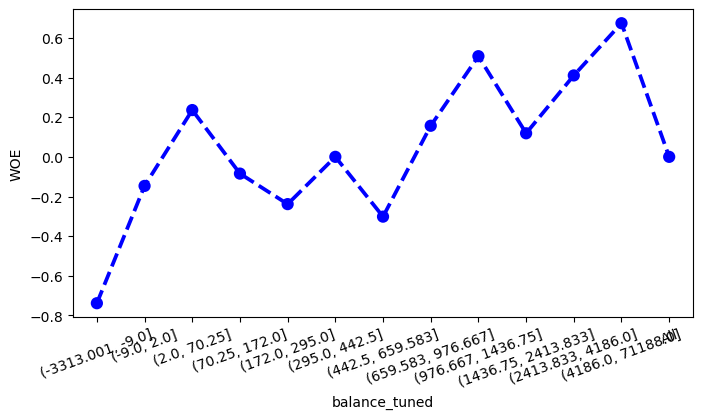

In [97]:
# Plot the WOE
plot_WOE(crosstab_balance_tuned12)

Before, binning_4 0.05 less than binnning_8 0.09. What if 12 bins?

In [98]:
# check IV_list balance
IV_list_tuned_12[0]

{'Characteristic': 'balance', 'Information Value': 0.1411930046150076}

With 12 bins in feature `balance`, we can increase IV to 0.11; it's in the medium level

**Characteristic Tuning 12 Bins : Age**

In [99]:
# check balance 
crosstab_age_tuned12 = WOE_list_tuned_12[1]

crosstab_age_tuned12

loan,0,1,All,p_good,p_bad,WOE,contribution
age_tuned,,,,,,,
"(18.999, 28.0]",195,37,232,0.086055,0.089806,-0.042666,0.000160
"(28.0, 31.0]",239,35,274,0.105472,0.084951,0.216367,0.004440
"(31.0, 33.0]",191,45,236,0.084289,0.109223,-0.259137,0.006461
"(33.0, 35.0]",189,42,231,0.083407,0.101942,-0.200671,0.003719
"(35.0, 37.0]",192,17,209,0.084731,0.041262,0.719534,0.031277
"(37.0, 39.0]",160,17,177,0.070609,0.041262,0.537212,0.015766
"(39.0, 42.0]",211,42,253,0.093116,0.101942,-0.090560,0.000799
"(42.0, 45.0]",169,33,202,0.074581,0.080097,-0.071357,0.000394
"(45.0, 49.0]",216,36,252,0.095322,0.087379,0.087011,0.000691


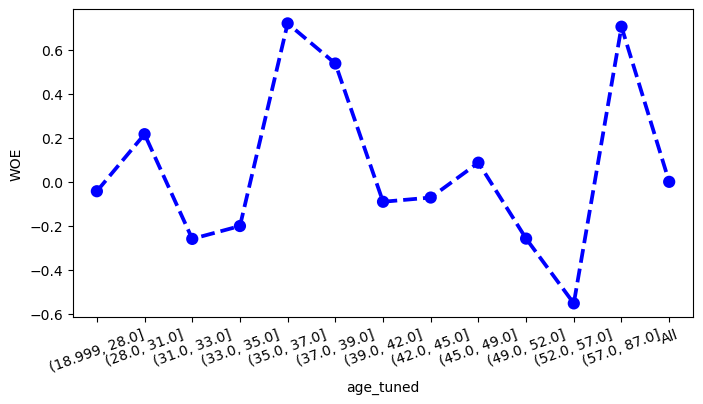

In [100]:
# Plot the WOE
plot_WOE(crosstab_age_tuned12)

 Before, binning_4 0.005 less than binnning_8 0.05. What if 12 bins?

In [101]:
# check IV_list age
IV_list_tuned_12[1]

{'Characteristic': 'age', 'Information Value': 0.1303460782288}

With 12 bins in feature `age`, we can increase IV to 0.10; it's in the medium level

What if 18 bins?

#### **Tuning 18 Bins**

In [102]:
# Call function WOE_IV_tuned
IV_list_tuned_18, WOE_list_tuned_18 = WOE_IV_tuned(data = data_train,
                                                   variable_response = 'loan',
                                                   num_columns = num_columns,
                                                   num_of_bins=18)

**Characteristic Tuning 18 Bins : Balance**

In [103]:
# check balance 
crosstab_balance_tuned18 = WOE_list_tuned_18[0]

crosstab_balance_tuned18

loan,0,1,All,p_good,p_bad,WOE,contribution
balance_tuned,,,,,,,
"(-3313.001, -138.5]",111,38,149,0.048985,0.092233,-0.632804,2.736752e-02
"(-138.5, 0.0]",227,60,287,0.100177,0.145631,-0.374143,1.700648e-02
"(0.0, 2.0]",15,4,19,0.006620,0.009709,-0.382992,1.183118e-03
"(2.0, 43.889]",126,14,140,0.055605,0.033981,0.492476,1.064931e-02
"(43.889, 101.0]",123,27,150,0.054281,0.065534,-0.188401,2.120130e-03
"(101.0, 172.0]",126,23,149,0.055605,0.055825,-0.003960,8.738749e-07
"(172.0, 248.056]",125,23,148,0.055163,0.055825,-0.011929,7.896230e-06
"(248.056, 339.556]",117,31,148,0.051633,0.075243,-0.376561,8.890571e-03
"(339.556, 442.5]",127,22,149,0.056046,0.053398,0.048397,1.281462e-04


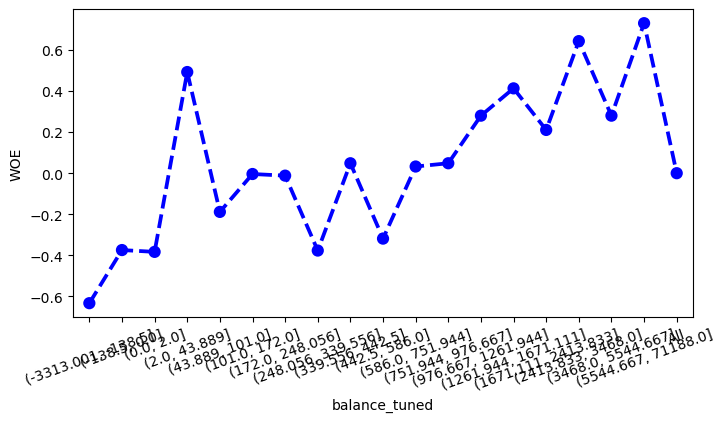

In [104]:
# Plot the WOE
plot_WOE(crosstab_balance_tuned18)

 Before, binning_12 0.10. What if 18 bins?

In [105]:
# check IV_list balance
IV_list_tuned_18[0]

{'Characteristic': 'balance', 'Information Value': 0.13343774019656487}

Before with 18 bins in feature `balance`, we can increase IV to 0.11; still in the medium level

**Characteristic Tuning 18 Bins : Age**

In [106]:
# check age
crosstab_age_tuned18 = WOE_list_tuned_18[1]

crosstab_age_tuned18

loan,0,1,All,p_good,p_bad,WOE,contribution
age_tuned,,,,,,,
"(18.999, 27.0]",145,25,170,0.063989,0.060680,0.053110,0.000176
"(27.0, 30.0]",184,29,213,0.081200,0.070388,0.142892,0.001545
"(30.0, 31.0]",105,18,123,0.046337,0.043689,0.058841,0.000156
"(31.0, 32.0]",105,25,130,0.046337,0.060680,-0.269664,0.003868
"(32.0, 34.0]",183,46,229,0.080759,0.111650,-0.323903,0.010006
"(34.0, 35.0]",92,16,108,0.040600,0.038835,0.044452,0.000078
"(35.0, 36.0]",105,12,117,0.046337,0.029126,0.464306,0.007991
"(36.0, 38.0]",175,16,191,0.077229,0.038835,0.687449,0.026394
"(38.0, 39.0]",72,6,78,0.031774,0.014563,0.780159,0.013427


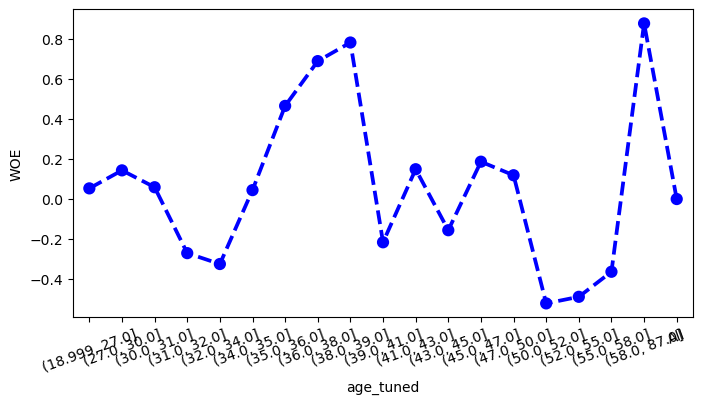

In [107]:
# Plot the WOE
plot_WOE(crosstab_age_tuned18)

 Before, binning_12 0.10. What if 18 bins?

In [108]:
# check IV_list balance
IV_list_tuned_18[1]

{'Characteristic': 'age', 'Information Value': 0.13932713071100086}

Before with 18 bins in feature `age`, we can increase IV to 0.16; still in the medium level

# **4. Design Scorecards**
---

- To design the scorecards, we will use a logistic regression model.
- We will perform the logistic regression not against the original input, but rather against the WOE of each grouping created in the previous step.

Therefore, we will transform the training set into the WOE value of each attribute.

## **Pre-processing Training Set**
---

In [109]:
# Check the train set
data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 992 to 3810
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          2678 non-null   int64   
 1   job          2678 non-null   object  
 2   marital      2678 non-null   object  
 3   education    2678 non-null   object  
 4   default      2678 non-null   object  
 5   balance      2678 non-null   int64   
 6   housing      2678 non-null   object  
 7   loan         2678 non-null   int64   
 8   age_bin      2678 non-null   category
 9   balance_bin  2678 non-null   category
dtypes: category(2), int64(3), object(5)
memory usage: 258.5+ KB


In [110]:
# Define data train
raw_train = data_train_copy.drop(columns = num_columns,
                                   axis = 1)
raw_train = raw_train.drop(columns = [variable_response],
                           axis = 1)

raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 992 to 3810
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          2678 non-null   object  
 1   marital      2678 non-null   object  
 2   education    2678 non-null   object  
 3   default      2678 non-null   object  
 4   housing      2678 non-null   object  
 5   age_bin      2678 non-null   category
 6   balance_bin  2678 non-null   category
dtypes: category(2), object(5)
memory usage: 195.8+ KB


Next, we will transform the training set into the WOE value of each attribute.

In [111]:
def transform_to_woe(raw_data, woe_table):
    """
    Function for transform data to woe

    Parameters:
    -----------
    raw_data : pd.dataframe
        Data after binning before

    woe_table : pd.dataframe
        contains characteristic, attribute, and contribution columns after WOE.

    Returns:
    --------
    woe_data : pd.dataframe
        Result transform each row to woe values           
    """
    # Make a copy for the raw data
    woe_data = raw_data.copy()

    # Create a dictionary to store WOE values for each category
    woe_dict = {}

    for column in raw_data.columns:
        # Define the raw data in woe_data as categorical values
        woe_data[column] = pd.Categorical(values=raw_data[column], ordered=False)

        # Recall WOE table for each column
        crosstab = woe_table[woe_table['Characteristic'] == column]

        # Create a dictionary mapping categories to their corresponding WOE values
        woe_dict[column] = dict(zip(crosstab['Attribute'], crosstab['WOE']))

        # Rename the categorical values in woe_data as WOE value using the dictionary
        woe_data[column] = woe_data[column].map(woe_dict[column])

    return woe_data


In [112]:
woe_train = transform_to_woe(raw_data = raw_train, 
                            woe_table = WOE_table)

woe_train.T

,992,1982,3240,522,1811,764,4295,2375,2716,4192,...,1316,3080,1203,853,851,3904,30,1836,3115,3810
job,-0.172999,-0.172999,-0.017835,-0.219020,-0.219020,-0.090560,-0.178692,0.706051,0.022473,0.259893,...,0.259893,-0.090560,0.249530,-0.017835,-0.172999,-0.219020,0.249530,-0.172999,-0.178692,-0.172999
marital,-0.021258,-0.021258,0.211215,-0.288148,0.211215,-0.021258,0.211215,0.211215,-0.021258,0.211215,...,-0.021258,-0.021258,-0.021258,-0.288148,-0.021258,-0.021258,-0.288148,0.211215,-0.021258,-0.021258
education,0.069917,0.069917,-0.178516,-0.178516,-0.178516,-0.178516,0.220753,-0.178516,0.220753,-0.178516,...,0.220753,-0.178516,0.069917,0.220753,-0.178516,-0.178516,-0.178516,0.069917,0.220753,0.069917
default,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,...,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796,0.020796
housing,0.003103,0.003103,-0.004094,0.003103,0.003103,0.003103,0.003103,-0.004094,-0.004094,0.003103,...,0.003103,-0.004094,0.003103,-0.004094,-0.004094,0.003103,-0.004094,0.003103,0.003103,0.003103
age_bin,0.257938,-0.164303,-0.024038,-0.024038,-0.024038,-0.029170,-0.029170,-0.029170,-0.164303,-0.029170,...,-0.029170,-0.029170,-0.024038,-0.024038,-0.024038,-0.029170,-0.164303,-0.029170,0.257938,-0.024038
balance_bin,0.081789,0.081789,-0.271141,0.081789,-0.271141,-0.271141,0.081789,0.081789,-0.271141,0.081789,...,0.381427,0.081789,0.381427,-0.111368,-0.271141,-0.111368,0.381427,0.381427,0.081789,0.381427


## **Pre-processing Validation Set**
---

We have to pre-process the valid data according to the pre-processing pipeline in train data.

In [113]:
# Concatenate X_valid and y_valid as data_valid
data_valid = pd.concat((x_valid, y_valid),
                      axis = 1)

# Validate data_test
print('Valid data shape:', data_valid.shape)

Valid data shape: (893, 8)


**Characteristic Binning : Valid**
---

We need to transform the raw data of features in the valid set into the WOE from the train set.

Here, we only bin the features using the same function for binning the data train.

Please note that we didn't tune any characteristics in the train set.

In [114]:
for column in num_columns:
  data_valid_binned = create_binning(data = data_valid,
                                    feature_label= column,
                                    num_of_bins = 4)

data_valid_binned.T

,3048,1551,4272,624,392,384,3490,3975,181,2598,...,1660,3252,3001,785,3782,3978,2555,4058,2500,2569
age,35,33,50,31,64,41,66,34,32,36,...,52,38,43,23,50,66,49,41,38,53
job,services,blue-collar,technician,self-employed,retired,blue-collar,management,services,services,blue-collar,...,services,management,management,student,blue-collar,retired,unemployed,admin.,student,technician
marital,single,married,married,married,married,married,single,married,single,single,...,married,married,married,married,married,married,married,married,single,married
education,secondary,primary,tertiary,tertiary,unknown,primary,tertiary,secondary,secondary,primary,...,secondary,tertiary,secondary,tertiary,secondary,tertiary,tertiary,secondary,tertiary,secondary
default,no,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,no,no,no,no,no,no
balance,414,245,199,1134,2923,8,6483,-315,0,367,...,108,2278,-26,-230,2320,1948,377,0,807,4541
housing,yes,yes,yes,no,no,yes,no,yes,no,no,...,yes,yes,yes,yes,yes,no,no,no,no,yes
loan,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
balance_bin,"(92.0, 489.0]","(92.0, 489.0]","(92.0, 489.0]","(489.0, 1553.0]","(1553.0, 22856.0]","(-1400.001, 92.0]","(1553.0, 22856.0]","(-1400.001, 92.0]","(-1400.001, 92.0]","(92.0, 489.0]",...,"(92.0, 489.0]","(1553.0, 22856.0]","(-1400.001, 92.0]","(-1400.001, 92.0]","(1553.0, 22856.0]","(1553.0, 22856.0]","(92.0, 489.0]","(-1400.001, 92.0]","(489.0, 1553.0]","(1553.0, 22856.0]"
age_bin,"(33.0, 40.0]","(20.999, 33.0]","(49.0, 84.0]","(20.999, 33.0]","(49.0, 84.0]","(40.0, 49.0]","(49.0, 84.0]","(33.0, 40.0]","(20.999, 33.0]","(33.0, 40.0]",...,"(49.0, 84.0]","(33.0, 40.0]","(40.0, 49.0]","(20.999, 33.0]","(49.0, 84.0]","(49.0, 84.0]","(40.0, 49.0]","(40.0, 49.0]","(33.0, 40.0]","(49.0, 84.0]"


In [115]:
# Sanity check
data_valid_binned.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
balance_bin    0
age_bin        0
dtype: int64

In [116]:
# WOE for data valid
# Put all two in a crosstab_list
crosstab_list_valid = crosstab_list(data = data_valid_binned,  num_columns = num_columns,
                                    cat_columns = cat_columns, variable_response = 'loan')

crosstab_list_valid

[loan                 0    1  All
 balance_bin                     
 (-1400.001, 92.0]  180   44  224
 (92.0, 489.0]      182   41  223
 (489.0, 1553.0]    194   29  223
 (1553.0, 22856.0]  199   24  223
 All                755  138  893,
 loan              0    1  All
 age_bin                      
 (20.999, 33.0]  185   42  227
 (33.0, 40.0]    214   35  249
 (40.0, 49.0]    173   32  205
 (49.0, 84.0]    183   29  212
 All             755  138  893,
 loan             0    1  All
 job                         
 admin.          64   16   80
 blue-collar    160   29  189
 entrepreneur    21    7   28
 housemaid       31    3   34
 management     172   30  202
 retired         36    7   43
 self-employed   31    6   37
 services        63   17   80
 student         25    0   25
 technician     118   21  139
 unemployed      21    1   22
 unknown         13    1   14
 All            755  138  893,
 loan        0    1  All
 marital                
 divorced   83   14   97
 married   487   

In [117]:
WOE_list_valid, IV_list_valid = calculate_woe_iv(crosstab_list = crosstab_list_valid)

In [118]:
WOE_table_valid = create_woe_table(crosstab_list = crosstab_list_valid)

WOE_table_valid

,Characteristic,Attribute,WOE
0,balance_bin,"(-1400.001, 92.0]",-0.290697
1,balance_bin,"(92.0, 489.0]",-0.209029
2,balance_bin,"(489.0, 1553.0]",0.201098
3,balance_bin,"(1553.0, 22856.0]",0.415787
0,age_bin,"(20.999, 33.0]",-0.216778
1,age_bin,"(33.0, 40.0]",0.111164
2,age_bin,"(40.0, 49.0]",-0.011908
3,age_bin,"(49.0, 84.0]",0.142726
0,job,admin.,-0.313170
1,job,blue-collar,0.008414


Now we are ready to transform the validing set into the WOE value of each attribute.

In [119]:
raw_valid = data_valid_binned.drop(columns = num_columns,
                                    axis = 1)

# Convert the categorical variables to dummy variables (i.e., one-hot encoding).
raw_valid = raw_valid.drop(columns = [variable_response],
                            axis = 1)

raw_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 3048 to 2569
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          893 non-null    object  
 1   marital      893 non-null    object  
 2   education    893 non-null    object  
 3   default      893 non-null    object  
 4   housing      893 non-null    object  
 5   balance_bin  893 non-null    category
 6   age_bin      893 non-null    category
dtypes: category(2), object(5)
memory usage: 76.4+ KB


In [120]:
woe_valid = transform_to_woe(raw_data = raw_valid, 
                            woe_table = WOE_table_valid)

woe_valid.T

,3048,1551,4272,624,392,384,3490,3975,181,2598,...,1660,3252,3001,785,3782,3978,2555,4058,2500,2569
job,-0.389543,0.008414,0.026698,-0.057236,-0.061855,0.008414,0.046833,-0.389543,-0.389543,0.008414,...,-0.389543,0.046833,0.046833,inf,0.008414,-0.061855,1.345058,-0.313170,inf,0.026698
marital,0.024384,-0.022059,-0.022059,-0.022059,-0.022059,-0.022059,0.024384,-0.022059,0.024384,0.024384,...,-0.022059,-0.022059,-0.022059,-0.022059,-0.022059,-0.022059,-0.022059,-0.022059,0.024384,-0.022059
education,-0.209029,0.323738,0.100806,0.100806,1.826896,0.323738,0.100806,-0.209029,-0.209029,0.323738,...,-0.209029,0.100806,-0.209029,0.100806,-0.209029,0.100806,0.100806,-0.209029,0.100806,-0.209029
default,0.032460,0.032460,0.032460,0.032460,0.032460,0.032460,0.032460,0.032460,0.032460,0.032460,...,0.032460,0.032460,0.032460,-1.293999,0.032460,0.032460,0.032460,0.032460,0.032460,0.032460
housing,-0.060827,-0.060827,-0.060827,0.080531,0.080531,-0.060827,0.080531,-0.060827,0.080531,0.080531,...,-0.060827,-0.060827,-0.060827,-0.060827,-0.060827,0.080531,0.080531,0.080531,0.080531,-0.060827
balance_bin,-0.209029,-0.209029,-0.209029,0.201098,0.415787,-0.290697,0.415787,-0.290697,-0.290697,-0.209029,...,-0.209029,0.415787,-0.290697,-0.290697,0.415787,0.415787,-0.209029,-0.290697,0.201098,0.415787
age_bin,0.111164,-0.216778,0.142726,-0.216778,0.142726,-0.011908,0.142726,0.111164,-0.216778,0.111164,...,0.142726,0.111164,-0.011908,-0.216778,0.142726,0.142726,-0.011908,-0.011908,0.111164,0.142726


## **Pre-processing Testing Set**
---

We have to pre-process the test data according to the pre-processing pipeline in train and valid data.

In [121]:
# Concatenate x_test and y_test as data_test
data_test = pd.concat((x_test, y_test),
                      axis = 1)

# Validate data_test
print('Valid data shape:', data_test.shape)

Valid data shape: (893, 8)


**Characteristic Binning : Test**
---

We need to transform the raw data of features in the test set into the WOE from the train set.

Here, we only bin the features using the same function for binning the data train.

Please note that we didn't tune any characteristics in the train set.

In [122]:
for column in num_columns:
  data_test_binned = create_binning(data = data_test,
                                    feature_label= column,
                                    num_of_bins = 4)

data_test_binned.T

,1548,872,1675,3391,2862,1477,2267,1377,3740,1722,...,3838,1295,2825,1687,3977,1373,2710,3796,1867,2745
age,32,33,34,36,44,31,30,36,36,56,...,47,24,57,44,37,56,44,66,47,34
job,services,technician,blue-collar,blue-collar,technician,services,blue-collar,blue-collar,blue-collar,management,...,blue-collar,management,blue-collar,technician,admin.,blue-collar,services,retired,technician,management
marital,single,single,married,married,single,married,single,married,divorced,married,...,married,single,married,divorced,married,married,divorced,married,married,married
education,unknown,secondary,primary,unknown,tertiary,secondary,primary,primary,primary,secondary,...,secondary,tertiary,primary,secondary,tertiary,primary,secondary,primary,secondary,tertiary
default,no,no,no,no,no,no,no,no,no,no,...,yes,no,no,no,no,no,no,no,no,no
balance,6145,716,1666,70,900,428,185,0,-308,238,...,-614,172,179,809,801,379,0,206,65,1657
housing,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,...,yes,no,no,yes,no,no,yes,no,no,yes
loan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
balance_bin,"(1570.0, 26394.0]","(428.0, 1570.0]","(1570.0, 26394.0]","(69.0, 428.0]","(428.0, 1570.0]","(69.0, 428.0]","(69.0, 428.0]","(-1680.001, 69.0]","(-1680.001, 69.0]","(69.0, 428.0]",...,"(-1680.001, 69.0]","(69.0, 428.0]","(69.0, 428.0]","(428.0, 1570.0]","(428.0, 1570.0]","(69.0, 428.0]","(-1680.001, 69.0]","(69.0, 428.0]","(-1680.001, 69.0]","(1570.0, 26394.0]"
age_bin,"(18.999, 33.0]","(18.999, 33.0]","(33.0, 39.0]","(33.0, 39.0]","(39.0, 48.0]","(18.999, 33.0]","(18.999, 33.0]","(33.0, 39.0]","(33.0, 39.0]","(48.0, 86.0]",...,"(39.0, 48.0]","(18.999, 33.0]","(48.0, 86.0]","(39.0, 48.0]","(33.0, 39.0]","(48.0, 86.0]","(39.0, 48.0]","(48.0, 86.0]","(39.0, 48.0]","(33.0, 39.0]"


In [123]:
# Sanity check
data_test_binned.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
balance_bin    0
age_bin        0
dtype: int64

In [124]:
# WOE for data valid
# Put all two in a crosstab_list
crosstab_list_test = crosstab_list(data = data_test_binned,  num_columns = num_columns,
                                    cat_columns = cat_columns, variable_response = 'loan')

crosstab_list_test

[loan                 0    1  All
 balance_bin                     
 (-1680.001, 69.0]  179   46  225
 (69.0, 428.0]      183   39  222
 (428.0, 1570.0]    193   30  223
 (1570.0, 26394.0]  200   23  223
 All                755  138  893,
 loan              0    1  All
 age_bin                      
 (18.999, 33.0]  228   30  258
 (33.0, 39.0]    160   39  199
 (39.0, 48.0]    185   34  219
 (48.0, 86.0]    182   35  217
 All             755  138  893,
 loan             0    1  All
 job                         
 admin.          75   19   94
 blue-collar    161   28  189
 entrepreneur    25   11   36
 housemaid       23    2   25
 management     174   21  195
 retired         38    8   46
 self-employed   30    4   34
 services        64   15   79
 student         13    0   13
 technician     132   25  157
 unemployed      16    5   21
 unknown          4    0    4
 All            755  138  893,
 loan        0    1  All
 marital                
 divorced   83   11   94
 married   446  1

In [125]:
WOE_list_test, IV_list_test = calculate_woe_iv(crosstab_list = crosstab_list_test)

In [126]:
WOE_table_test = create_woe_table(crosstab_list = crosstab_list_test)

WOE_table_test

,Characteristic,Attribute,WOE
0,balance_bin,"(-1680.001, 69.0]",-0.340720
1,balance_bin,"(69.0, 428.0]",-0.153540
2,balance_bin,"(428.0, 1570.0]",0.162029
3,balance_bin,"(1570.0, 26394.0]",0.463359
0,age_bin,"(18.999, 33.0]",0.328684
1,age_bin,"(33.0, 39.0]",-0.287852
2,age_bin,"(39.0, 48.0]",-0.005469
3,age_bin,"(48.0, 86.0]",-0.050805
0,job,admin.,-0.326415
1,job,blue-collar,0.049736


In [127]:
raw_test = data_test_binned.drop(columns = num_columns,
                                    axis = 1)

# Convert the categorical variables to dummy variables (i.e., one-hot encoding).
raw_test = raw_test.drop(columns = [variable_response],
                            axis = 1)

raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 1548 to 2745
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          893 non-null    object  
 1   marital      893 non-null    object  
 2   education    893 non-null    object  
 3   default      893 non-null    object  
 4   housing      893 non-null    object  
 5   balance_bin  893 non-null    category
 6   age_bin      893 non-null    category
dtypes: category(2), object(5)
memory usage: 76.4+ KB


In [128]:
woe_test = transform_to_woe(raw_data = raw_test, 
                            woe_table = WOE_table_test)

woe_test.T

,1548,872,1675,3391,2862,1477,2267,1377,3740,1722,...,3838,1295,2825,1687,3977,1373,2710,3796,1867,2745
job,-0.248631,-0.035538,0.049736,0.049736,-0.035538,-0.248631,0.049736,0.049736,0.049736,0.415069,...,0.049736,0.415069,0.049736,-0.035538,-0.326415,0.049736,-0.248631,-0.141319,-0.035538,0.415069
marital,0.585577,0.585577,-0.243536,-0.243536,0.585577,-0.243536,0.585577,-0.243536,0.321481,-0.243536,...,-0.243536,0.585577,-0.243536,0.321481,-0.243536,-0.243536,0.321481,-0.243536,-0.243536,-0.243536
education,inf,-0.232201,0.047445,inf,0.201814,-0.232201,0.047445,0.047445,0.047445,-0.232201,...,-0.232201,0.201814,0.047445,-0.232201,0.201814,0.047445,-0.232201,0.047445,-0.232201,0.201814
default,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,...,-1.006317,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571,0.023571
housing,-0.152619,-0.152619,-0.152619,-0.152619,-0.152619,-0.152619,0.228799,-0.152619,-0.152619,-0.152619,...,-0.152619,0.228799,0.228799,-0.152619,0.228799,0.228799,-0.152619,0.228799,0.228799,-0.152619
balance_bin,0.463359,0.162029,0.463359,-0.153540,0.162029,-0.153540,-0.153540,-0.340720,-0.340720,-0.153540,...,-0.340720,-0.153540,-0.153540,0.162029,0.162029,-0.153540,-0.340720,-0.153540,-0.340720,0.463359
age_bin,0.328684,0.328684,-0.287852,-0.287852,-0.005469,0.328684,0.328684,-0.287852,-0.287852,-0.050805,...,-0.005469,0.328684,-0.050805,-0.005469,-0.287852,-0.050805,-0.005469,-0.050805,-0.005469,-0.287852


## **Logistic Regression Modeling**
---

In [129]:
# Define X_train
x_train = woe_train.to_numpy()
x_train

array([[-0.17299876, -0.02125823,  0.06991694, ...,  0.00310318,
         0.25793785,  0.08178943],
       [-0.17299876, -0.02125823,  0.06991694, ...,  0.00310318,
        -0.16430305,  0.08178943],
       [-0.01783487,  0.21121498, -0.17851649, ..., -0.00409417,
        -0.02403763, -0.27114122],
       ...,
       [-0.17299876,  0.21121498,  0.06991694, ...,  0.00310318,
        -0.02917038,  0.38142748],
       [-0.17869179, -0.02125823,  0.22075319, ...,  0.00310318,
         0.25793785,  0.08178943],
       [-0.17299876, -0.02125823,  0.06991694, ...,  0.00310318,
        -0.02403763,  0.38142748]])

In [130]:
# Check y_train
y_train = y_train.to_numpy()
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
# Define X_valid
x_valid = woe_valid.to_numpy()
x_valid

array([[-0.38954268,  0.0243842 , -0.20902944, ..., -0.060827  ,
        -0.20902944,  0.11116389],
       [ 0.00841392, -0.02205945,  0.32373776, ..., -0.060827  ,
        -0.20902944, -0.21677786],
       [ 0.02669812, -0.02205945,  0.10080609, ..., -0.060827  ,
        -0.20902944,  0.14272626],
       ...,
       [-0.3131697 , -0.02205945, -0.20902944, ...,  0.08053056,
        -0.29069685, -0.01190837],
       [        inf,  0.0243842 ,  0.10080609, ...,  0.08053056,
         0.20109826,  0.11116389],
       [ 0.02669812, -0.02205945, -0.20902944, ..., -0.060827  ,
         0.41578693,  0.14272626]])

In [132]:
# Check y_valid
y_valid = y_valid.to_numpy()
y_valid

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

We are ready for modeling.

But we need to find the best possible model using all available options.

- We will use the **Forward Selection** procedure since we have relatively many predictors.
- We use **Recall** or Sensitivity score to choose the best model, in which the model with the highest score is the best model.
  - The bad rate in our sample is relatively high, about 22%.
  - Thus we want to reduce the bad rate, which means
  - We want to maximize the rejection of bads (True Positive) or maximizes the True Positive Rate (TPR)/Recall/Sensitivity.

#### **Perform Forward Selection**
---
Begin with null model (no predictors), then adds predictor that gives the greatest additional improvement to the model, one-at-a-time.

Define function `forward()` to fit a model on the train set and calculate its Recall score from the test set.

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

def handle_infinity(X):
    """
    Function to handle infinity values in the input matrix X by replacing them with NaNs and then filling NaNs with column means.

    Parameters:
    -----------
    X : array-like
        Input matrix containing possibly infinite values.

    Returns:
    --------
    X_clean : array-like
        Cleaned matrix with infinity values replaced by NaNs and NaNs filled with column means.
    """
    X_clean = np.where(np.isinf(X), np.nan, X)
    column_means = np.nanmean(X_clean, axis=0)
    X_clean = np.where(np.isnan(X_clean), column_means, X_clean)
    return X_clean

def forward(x, y):
    """
    Function to perform forward feature selection for logistic regression with balanced class weights.

    Parameters:
    -----------
    x : array-like
        Feature matrix.

    y : array-like
        Target labels.

    Returns:
    --------
    forward_models : pandas DataFrame
        DataFrame containing the predictors and recall scores for each iteration of forward feature selection.
    """
    # Initialize DataFrame to store iteration results
    forward_models = pd.DataFrame(columns=["Predictors", "Recall"])

    # Initialize logistic regression model with balanced class weights
    model = LogisticRegression(class_weight='balanced')

    # Iterate through all predictors from lowest to highest
    for i in range(x.shape[1]):
        # Select predictors from 0 to i (inclusive)
        predictors = list(range(i+1))
        
        # Create a subset of the validation data containing only the current predictors
        X_subset = x[:, :i+1]
        
        # Handle infinity values in the subset data
        X_subset_clean = handle_infinity(X_subset)
        
        # Train the model on the subset of the validation data
        model.fit(X_subset_clean, y)
        
        # Predict labels on the validation data
        y_pred = model.predict(X_subset_clean)

        # Calculate recall score
        recall = recall_score(y, y_pred)
        
        # Store iteration results in the DataFrame
        forward_models.loc[i] = [predictors, recall]

    return forward_models


In [134]:
forward_models = forward(x = x_valid, y = y_valid)

forward_models 

,Predictors,Recall
0,[0],0.384058
1,"[0, 1]",0.384058
2,"[0, 1, 2]",0.623188
3,"[0, 1, 2, 3]",0.630435
4,"[0, 1, 2, 3, 4]",0.623188
5,"[0, 1, 2, 3, 4, 5]",0.615942
6,"[0, 1, 2, 3, 4, 5, 6]",0.608696


Next, find the best model with the highest Recall score.

In [135]:
# Find the best Recall score
best_idx = forward_models['Recall'].argmax()
best_recall = forward_models['Recall'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# Print the summary
print('Best index            :', best_idx)
print('Best Recall           :', best_recall)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(raw_train.columns[best_predictors].tolist())

Best index            : 3
Best Recall           : 0.6304347826086957
Best predictors (idx) : [0, 1, 2, 3]
Best predictors       :
['job', 'marital', 'education', 'default']


**Refit** the best model on whole `X_train` data.

In [136]:
x_train = handle_infinity(X = x_train)

# Define X with best predictors
X_train_best = x_train[:, best_predictors]

# Fit best model
best_model = LogisticRegression(class_weight = 'balanced')

best_model.fit(X_train_best, y_train)

LogisticRegression(class_weight='balanced')

Extract the best model' parameter estimates.

In [137]:
best_model_intercept = pd.DataFrame({'Estimate': best_model.intercept_},
                                    index = ["Intercept"])
best_model_intercept

,Estimate
Intercept,-0.007374


In [138]:
best_model_params = raw_train.columns[best_predictors].tolist()
best_model_coefs = pd.DataFrame({'Estimate': np.reshape(best_model.coef_, best_model.coef_.shape[1])}, index=best_model_params)

best_model_summary = pd.concat((best_model_intercept, best_model_coefs), axis=0)

best_model_summary

,Estimate
Intercept,-0.007374
job,-0.835245
marital,-0.886325
education,-0.817774
default,-0.917683


## **Model Evaluation**
---

#### **Predict on Train Data**
---

In [139]:
# Predict class labels for sample in X_train.
y_train_pred = best_model.predict(X_train_best)
y_train_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [140]:
# Calculate the recall score on the train set
recall_train = recall_score(y_true = y_train,
                            y_pred = y_train_pred)

recall_train

0.6650485436893204

Recall score from the train set is 0.665.

Want to check the distribution of the predicted probabilities?

In [141]:
# Predict the probability estimates
y_train_pred_proba = best_model.predict_proba(X_train_best)[:,[1]]
y_train_pred_proba

array([[0.51991515],
       [0.51991515],
       [0.48680772],
       ...,
       [0.46845596],
       [0.4902782 ],
       [0.51991515]])

<Axes: ylabel='Count'>

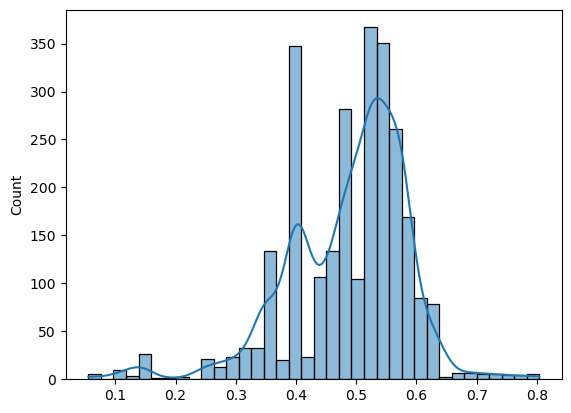

In [142]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_train_pred_proba,
                            y_train.shape[0]),
             kde = True)

#### **Predict on Test Data**
---

In [143]:
# Define X_test
X_test = woe_test.to_numpy()
X_test

array([[-0.24863118,  0.58557672,         inf, ..., -0.152619  ,
         0.46335909,  0.32868418],
       [-0.03553797,  0.58557672, -0.23220064, ..., -0.152619  ,
         0.16202874,  0.32868418],
       [ 0.04973579, -0.24353601,  0.04744484, ..., -0.152619  ,
         0.46335909, -0.28785189],
       ...,
       [-0.14131945, -0.24353601,  0.04744484, ...,  0.22879857,
        -0.15353956, -0.05080544],
       [-0.03553797, -0.24353601, -0.23220064, ...,  0.22879857,
        -0.34071965, -0.00546876],
       [ 0.4150688 , -0.24353601,  0.20181393, ..., -0.152619  ,
         0.46335909, -0.28785189]])

In [144]:
# Check y_test
y_test = y_test.to_numpy()
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [145]:
# Memproses data uji dengan fungsi handle_infinity
X_test = handle_infinity(X=X_test)

# Mendefinisikan X dengan prediktor terbaik
X_test_best = X_test[:, best_predictors]

# Memfiturkan model terbaik pada data uji yang telah diproses
best_model.fit(X_test_best, y_test)

LogisticRegression(class_weight='balanced')

In [146]:
# Define X_test with best predictors
X_test_best = X_test[:, best_predictors]

# Predict class labels for sample in X_test.
y_test_pred = best_model.predict(X_test_best)
y_test_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [147]:
# Calculate the recall score on the test set
recall_test = recall_score(y_true = y_test,
                           y_pred = y_test_pred)

recall_test

0.6521739130434783

Recall score from the test set is 0.65.

Check the distribution of the predicted probabilities.

In [148]:
# Predict the probability estimates
y_test_pred_proba = best_model.predict_proba(X_test_best)[:,[1]]
y_test_pred_proba

array([[0.41167918],
       [0.3872556 ],
       [0.52427595],
       [0.53237925],
       [0.35288205],
       [0.60405523],
       [0.34984991],
       [0.52427595],
       [0.40339162],
       [0.47762239],
       [0.5479121 ],
       [0.56414858],
       [0.36321312],
       [0.44100064],
       [0.60344772],
       [0.44262459],
       [0.44519373],
       [0.60405523],
       [0.52759306],
       [0.37779791],
       [0.46002299],
       [0.34984991],
       [0.44164516],
       [0.52427595],
       [0.5479121 ],
       [0.5479121 ],
       [0.60405523],
       [0.56414858],
       [0.52427595],
       [0.40011703],
       [0.32615327],
       [0.65572517],
       [0.49846451],
       [0.61831239],
       [0.5479121 ],
       [0.35288205],
       [0.36321312],
       [0.71264046],
       [0.37779791],
       [0.27808487],
       [0.25744001],
       [0.37176767],
       [0.43930628],
       [0.27808487],
       [0.3872556 ],
       [0.37176767],
       [0.52759306],
       [0.405

<Axes: ylabel='Count'>

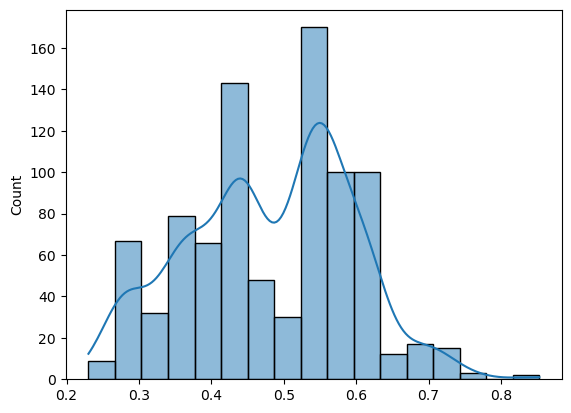

In [149]:
# Distribution plot of predicted probability
sns.histplot(x = np.reshape(y_test_pred_proba,
                            y_test.shape[0]),
             kde = True)

**Summary**:

- From model selection, we have a best logistic regression model that includes 4 predictors (`job`, `marital`, `education`, `default`).
- The sensitivity/recall score from the best model is about 0.63 on the train set and 0.65 test set, which means:
  - The model can predict about 65% of bad applicants correctly.
  - We still have a chance of about 25% to misclassify bads as goods.
- The best model may be questioned by other departments since the best model only contains 4 predictors.
  - Scorecards with too few characteristics are generally unable to withstand the test of time, as they are susceptible to minor changes in the applicant profile.
  - In business terms, scorecards should be developed to mimic the thought process of a seasoned, effective adjudicator or risk analyst. A good adjudicator will never look at just two or three things from an application form or account history to make a decision.

What can we do then?

- Regardless of the modeling technique used, we should produce a scorecard consisting of the optimal combination of characteristics, taking into account other issues such as:
  - Correlation between characteristics.
  - Final statistical strength of the scorecard.
  - Business sense.
  - Compliance with local regulations and laws.
  - Interpretability (causality) of characteristics from a business perspective—being able to explain in plain business language why that variable is strong and should be in the model.
  - Implementability from a technical perspective.
- The scorecard developer has several methods by which to influence the final shape of the model.
  - Forcing characteristics in, whereby characteristics deemed operationally necessary or “must have” are forced into the scorecard at the outset.
  - Manipulating regression to maximize the chances of certain characteristics entering the final model.


# **Model Estimate**

---

Before we obtain the best model with four predictors, which'are `job, marital, education, and default`.

Before we decide to use this predictor, we want to ensure that all predictors make the right decision.

what the step?
- Likelihood Ratio Test
- Deviance
- AIC
- Predictive Performance

### **Likelihood Ratio Test**
----

**Hypotheses** :
- Null Hypothesis: the logit model only contains intercept $\beta_{0}$.
- Alternative Hypothesis: the logit model contains $\beta_{0}$ and $\beta_{1}$.
    - $\text H_{0} : \beta = \beta_{0}$
    - $\text H_{1} : \beta = \beta_{0}, \beta_{1}$


**Test statistic**:
  - The likelihood ratio (LLR):

  $$
  \text{LLR} = -2 (L_{0}-L_{1})
  $$
<br>

  - $L_{0}$ is the maximum log likelihood of $M_{0}$.  
  - $L_{1}$ is the maximum log likelihood of $M_{1}$.

In [150]:
best_predictors_name = best_model_coefs.index.tolist()

best_predictors_name

['job', 'marital', 'education', 'default']

In [151]:
import statsmodels.formula.api as smf

def statsmodels(y, col, data):
    """
    Function to estimate logistic regression model and calculate likelihood ratio test (LLR).

    Parameters:
    -----------
    y : str
        Target variable name.

    col : str
        Predictor variable name.
    
    data : DataFrame
        DataFrame containing the data.

    Returns:
    --------
    None
    """
    # Determine predictor 
    formula = f'{y} ~ {col}' 

    # Adding interaction terms to the model
    model = smf.logit(formula=formula, data=data)
    
    # Fitting the model
    result = model.fit()

    # Extract L0 as ll_null
    ll_null = result.llnull

    # Extract L1 as ll_width
    ll_predictor = result.llf

    # Calculate LLR
    llr_predictor_scratch = -2 * (ll_null - ll_predictor)
    
    print(f"LLR = -2 * (L0: {ll_null:.2f} - L1: {ll_predictor:.3f})")

    # Print LLR from the summary output to cross check the scratch
    llr_predictor_summary = result.llr

    print(f"LLR from scratch = {llr_predictor_scratch:.3f}")
    print(f"LLR from summary = {llr_predictor_summary:.3f}")

    # Extract P-value of LLR
    p_val_llr = result.llr_pvalue

    if p_val_llr < 0.05:
        print(f"{col} vs target P-Value less than 0.05, then Significant")
    else :
        print(f"{col} vs target P-Value less than 0.05, then Not Significant")


In [152]:
# obtain LLR predictor 'Job'
statsmodels('y_valid_estimate', 'job', x_valid_estimate)

# obtain LLR predictor 'marital'
statsmodels('y_valid_estimate', 'marital', x_valid_estimate)

# obtain LLR predictor 'education'
statsmodels('y_valid_estimate', 'education', x_valid_estimate)

# obtain LLR predictor 'default'
statsmodels('y_valid_estimate', 'default', x_valid_estimate)

         Current function value: 0.420347
         Iterations: 35
LLR = -2 * (L0: -384.43 - L1: -375.370)
LLR from scratch = 18.125
LLR from summary = 18.125
job vs target P-Value less than 0.05, then Not Significant
Optimization terminated successfully.
         Current function value: 0.430422
         Iterations 6
LLR = -2 * (L0: -384.43 - L1: -384.367)
LLR from scratch = 0.133
LLR from summary = 0.133
marital vs target P-Value less than 0.05, then Not Significant
Optimization terminated successfully.
         Current function value: 0.424437
         Iterations 7
LLR = -2 * (L0: -384.43 - L1: -379.022)
LLR from scratch = 10.821
LLR from summary = 10.821
education vs target P-Value less than 0.05, then Significant
Optimization terminated successfully.
         Current function value: 0.427496
         Iterations 6
LLR = -2 * (L0: -384.43 - L1: -381.754)
LLR from scratch = 5.358
LLR from summary = 5.358
default vs target P-Value less than 0.05, then Significant


c:\Users\HP Notebook\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Rejection decision** :
- Since $\text{P-value of LLR} < \alpha=0.05$, the null hypothesis $\beta=\beta_{0}$ **is rejected** at $\alpha=0.05$.

**Conclusion** :
- The predictor `job` has an increase or match with the model but is not significant, so we conclude that the predictor rejects.
- The predictor `marital` has an increase or match with the model but is not significant, so we conclude that the predictor rejects
- The predictor `education` has an increase or match with the model and significant, so we conclude that the predictor not rejects
- The predictor `default` has an increase or match with the model and significant, so we conclude that the predictor not rejects





Next, we want to try with the Check 2 predictor, not rejects

In [153]:
def statsmodels(y, col_1, col_2, data):
    """
    Function to estimate logistic regression model and calculate likelihood ratio test (LLR).

    Parameters:
    -----------
    y : str
        Target variable name.

    col_1 : str
        First predictor variable name.

    col_2 : str
        Second predictor variable name.

    data : DataFrame
        DataFrame containing the data.

    Returns:
    --------
    tuple
        A tuple containing the LLR (likelihood ratio test) value, AIC (Akaike Information Criterion) value, and LL (log-likelihood) value
    """
    # Determine predictor 
    formula = f'{y} ~ {col_1} + {col_2}' 

    # Adding interaction terms to the model
    model = smf.logit(formula=formula, data=data)
    
    # Fitting the model
    result = model.fit()

    # aic values
    aic = result.aic

    # Extract L0 as ll_null
    ll_null = result.llnull

    # Extract L1 as ll_width
    ll_predictor = result.llf

    # Calculate LLR
    llr_predictor_scratch = -2 * (ll_null - ll_predictor)
    
    print(f"LLR = -2 * (L0: {ll_null:.2f} - L1: {ll_predictor:.3f})")

    # Print LLR from the summary output to cross check the scratch
    llr_predictor_summary = result.llr

    print(f"LLR from scratch = {llr_predictor_scratch:.3f}")
    print(f"LLR from summary = {llr_predictor_summary:.3f}")

    # Extract P-value of LLR
    p_val_llr = result.llr_pvalue

    if p_val_llr < 0.05:
        print(f"{col_1} and {col_2} vs target P-Value less than 0.05, then Significant")
        
    else :
        print(f"{col_1} and {col_2} vs target P-Value less than 0.05, then Not Significant")

    return llr_predictor_scratch, aic, ll_predictor, result

In [154]:
# obtain LLR predictor 'education' and 'default'
llr_m1, aic_m1, ll_predictor_m1, result_1= statsmodels(y = 'y_valid_estimate', 
                                                      col_1 = 'education', 
                                                      col_2 = 'default', 
                                                      data = x_valid_estimate)

Optimization terminated successfully.
         Current function value: 0.421779
         Iterations 7
LLR = -2 * (L0: -384.43 - L1: -376.649)
LLR from scratch = 15.568
LLR from summary = 15.568
education and default vs target P-Value less than 0.05, then Significant


**Conclusion** :

> Predictors `education` and `default`, if we combine them still, have an increase or match with the model and are significant.

How about with all best predictor?

In [155]:
def statsmodels(data):
    """
    Function to estimate logistic regression model and calculate likelihood ratio test (LLR).

    Parameters:
    -----------
    data : DataFrame
        DataFrame containing the data.

    Returns:
    --------
    tuple
        Tuple containing the LLR (likelihood ratio test), AIC (Akaike Information Criterion), and LL (log-likelihood) values,
    """
    # Determine predictor 
    formula = f'y_valid_estimate ~ job + marital + education + default' 

    # Adding interaction terms to the model
    model = smf.logit(formula=formula, data=data)
    
    # Fitting the model
    result = model.fit()

    # aic values
    aic = result.aic

    # Extract L0 as ll_null
    ll_null = result.llnull

    # Extract L1 as ll_width
    ll_predictor = result.llf

    # Calculate LLR
    llr_predictor_scratch = -2 * (ll_null - ll_predictor)
    
    print(f"LLR = -2 * (L0: {ll_null:.2f} - L1: {ll_predictor:.3f})")

    # Print LLR from the summary output to cross check the scratch
    llr_predictor_summary = result.llr

    print(f"LLR from scratch = {llr_predictor_scratch:.3f}")
    print(f"LLR from summary = {llr_predictor_summary:.3f}")

    # Extract P-value of LLR
    p_val_llr = result.llr_pvalue

    if p_val_llr < 0.05:
        print(f"Best Predictor vs target P-Value less than 0.05, then Significant")
    else:
        print(f"Best Predictor vs target P-Value less than 0.05, then Not Significant")
    
    return llr_predictor_scratch, aic, ll_predictor, result

In [156]:
# best predictor
llr_m2, aic_m2, ll_predictor_m2, result_2 = statsmodels(x_valid_estimate)

         Current function value: 0.412842
         Iterations: 35
LLR = -2 * (L0: -384.43 - L1: -368.668)
LLR from scratch = 31.530
LLR from summary = 31.530
Best Predictor vs target P-Value less than 0.05, then Significant


c:\Users\HP Notebook\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Conclusion** :

> Best Predictors , if we combine them still, have an increase or match with the model and are significant.

### **Deviance**
----

We want to compare the two models by comparing their deviances.
  - $M_{1}$ with maximized log-likelihood $L_{1}$ and logit model:
  $$
  \text{logit(loan)} = \beta_{0} + \beta_{1}(\text{job}) + \beta_{1}(\text{education})
  $$
  - $M_{2}$ with maximized log-likelihood $L_{2}$ and logit model:
  $$
  \text{logit(loan)} = \beta_{0} + \beta_{1}(\text{job}) + \beta_{1}(\text{education}) + \beta_{1}(\text{default}) + \beta_{1}(\text{marital})
  $$
<br>
The deviance difference:

$$
\text{Deviance difference} = -2(L_{1}-L_{2})
$$


In [157]:
# Calculate deviance difference
deviance_diff = -2 * (llr_m1 - llr_m2)

print(f"Deviance difference = {deviance_diff:.3f}")

Deviance difference = 31.925


In [158]:
# Extract tabulated chi-squared of deviance difference
import scipy.stats as stats

chi_sq = stats.chi2.ppf(q = 1-0.05,
                        df = 1)

print(f"Tabulated chi-sq = {chi_sq:.4f}")

Tabulated chi-sq = 3.8415


We want to Hipotesis Test:

- $H0$ : Simple Model

- $H1$ : Complex Model

If we compare `deviation` > `Chi-Sq`, we can reject H0 and not reject H1. Then we can be confident in the model complex that can be used.

### **AIC**
---

- When comparing two models, the smaller value of AIC indicates the better model.
$$
\text{AIC} = -2(\text{log likelihood - number of parameters in model})
$$

---
Model 1 (job and education)

Or calculate with the formula $\text{AIC} = -2(\text{log likelihood - number of parameters in model})$, where number of parameters in model 1 is 3 (parameter $\beta_{0}$ and $\beta_{1}$)

In [159]:
# Extract AIC of model 1 and scratch
aic_width_scratch = -2 * (ll_predictor_m1 - 3)

print(f"AIC model 1 = {aic_m1:.2f}")
print(f"AIC model 1 Scratch = {aic_width_scratch:.2f}")

AIC model 1 = 763.30
AIC model 1 Scratch = 759.30


---
Model 2 (job, marital, default, and education)

Or calculate with the formula $\text{AIC} = -2(\text{log likelihood - number of parameters in model})$, where number of parameters in model 2 is 5 (parameter $\beta_{0}$ and $\beta_{1}$)

In [160]:
# Extract AIC of model 2 and scratch
aic_width_scratch2 = -2 * (ll_predictor_m2 - 5)

print(f"AIC model 2 = {aic_m2:.2f}")
print(f"AIC model 2 Scratch = {aic_width_scratch2:.2f}")

AIC model 2 = 773.34
AIC model 2 Scratch = 747.34


In [161]:
# Print and compare AIC model 1 & 2
print(f"AIC model 1 = {aic_m1:.2f}")
print(f"AIC model 2 = {aic_m2:.2f}")

AIC model 1 = 763.30
AIC model 2 = 773.34


**Conclusion**
> Model 1 with 2 predictor width yields the smaller AIC, thus adding predictor default and default has no effect on logit model.

This interpretation is consistent with the interpretation of comparing the two models by their deviance difference.



### **Predictive Performance**

In [162]:
import numpy as np
from sklearn.metrics import roc_auc_score

def predictive_performance(model_result, threshold=0.5):
    """
    Calculate model's predictive performance

    Parameters
    ----------
    model_result : result of fitted model
        Model result from Statsmodels Logit

    threshold : float in range[0,1], default = 0.5
        Cut-off probability to classify predicted outcome

    Returns
    -------
    accuracy : float
        The accuracy

    sensitivity : float
        The true positive rate

    specificity : float
        The true negative rate
        
    roc_auc : float
        Area Under Curve (AUC) of Receiver Operating Characteristic (ROC)
    """
    # Create classification matrix from model result
    matrix = model_result.pred_table(threshold)

    # Define the components of classification matrix
    TP = matrix[1][1]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]

    # Calculate metrics from classification matrix
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    # Extract predicted probabilities
    predicted_probs = model_result.predict()

    # Calculate ROC AUC
    roc_auc = roc_auc_score(model_result.model.endog, predicted_probs)

    return accuracy, sensitivity, specificity, roc_auc


In [163]:
# Cross check the predictive performance of Model 1 
performa_m1 = predictive_performance(model_result = result_1,
                                     threshold = 0.5)
# Extract the metrics
accuracy_m1, sensitivity_m1, specificity_m1, roc_auc_m1 = performa_m1

In [164]:
# Cross check the predictive performance of Model 2
performa_m2 = predictive_performance(model_result = result_2,
                                     threshold = 0.5)
# Extract the metrics
accuracy_m2, sensitivity_m2, specificity_m2, roc_auc_m2 = performa_m2

In [165]:
# Create dataframe
df = pd.DataFrame({
    'Model' : ['Model 1', 'Model 2'],
    'Accuracy' : [accuracy_m1, accuracy_m2],
    'sensitivity' : [sensitivity_m1, sensitivity_m2],
    'specificity_m2' : [specificity_m1, specificity_m2],
    'ROC AUC' : [roc_auc_m1, roc_auc_m2]})

df

,Model,Accuracy,sensitivity,specificity_m2,ROC AUC
0,Model 1,0.845465,0.000000,1.000000,0.576888
1,Model 2,0.845465,0.007246,0.998675,0.628664


**Conclusion**:

> Model 2 results the better sensitivity and specificity, with the same value of accuracy.

### **ROC and AUC**
---

- What if we choose other values for cut-off probability $\pi_{0}$?
- We can plot the ROC curve and its AUC.

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model_results, labels):
    """
    Plot Receiver Operating Characteristic (ROC) curve for multiple models

    Parameters
    ----------
    model_results : list of result of fitted models
        List of model results from Statsmodels Logit
        
    labels : list of str
        List of labels for each model

    Returns
    -------
    None
    """
    # Initialize plot
    plt.figure(figsize=(8, 6))

    # Plot ROC curve for each model
    for model_result, label in zip(model_results, labels):
        # Extract actual target values
        actual = model_result.model.endog

        # Extract predicted probabilities
        predicted_probs = model_result.predict()

        # Calculate fpr, tpr, thresholds
        fpr, tpr, _ = roc_curve(actual, predicted_probs)
        
        # Calculate AUC
        auc = roc_auc_score(actual, predicted_probs)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {auc:.2f})')

    # Plot random guess line
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

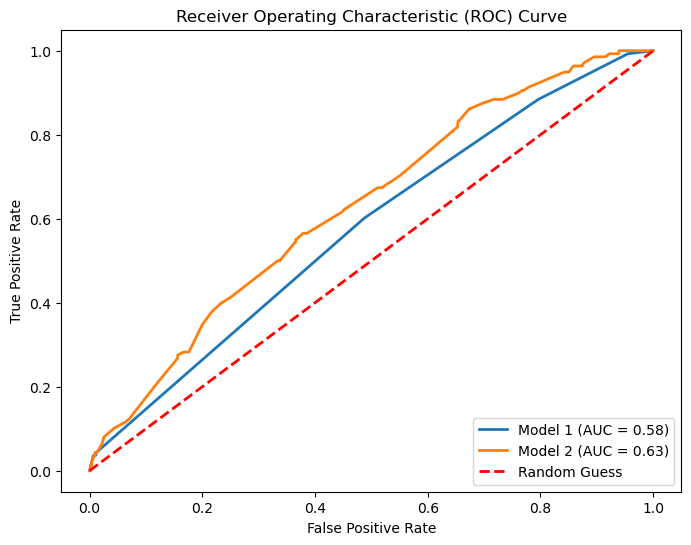

In [167]:
plot_roc_curve([result_1, result_2], ['Model 1', 'Model 2'])

**Conclusion** :
- We can see only a trivial difference between the two ROC curves, but `model 2` yields the higher AUC.
- We can determine from LLR that `model 2` is better than `model 1`.
- We can obtain from AIC that `model 2` is worse than `model 1`, but remember, AIC finds a simple model. We can refuse this because roc auc and LLR select `model 2` over `model 1`.

## **Scaling**

---

### **Create Scorecards**
---

We using model 2 and data train for create scorecards 

Assign score to each attribute by specifying:
- Odds of good of 30:1 at 300 points score, and
- 20 PDO (points to double the odds of good).

Thus, we can calculate the offset and factor:
- $\text{Factor}=\text{PDO}/ \ln(2)$
- $\text{Offset} = \text{Score} − {\text{Factor} ∗ \ln (\text{Odds of good})}$

In [168]:
# Define Factor and Offset
factor = 20/np.log(2)
offset = 300-(factor*np.log(30))

print(f"Offset = {offset:.2f}")
print(f"Factor = {factor:.2f}")

Offset = 201.86
Factor = 28.85


Therefore, the score point for each attribute $j$ in each characteristic $i$:
$$
\frac{\text{Offset}}{n} - \text{Factor} \times \left (\frac{\beta_0}{n}  + \beta_i \times \text{WOE}_j \right )
$$


In [169]:
# Define n = number of characteristics
n = len(best_model_params)

# Define b0
b0 = best_model.intercept_[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 4
b0 = -0.0394


we want to obtain Characteristic and estimate from row train

In [170]:
WOE_table

,Characteristic,Attribute,WOE
0,balance_bin,"(-3313.001, 70.25]",-0.271141
1,balance_bin,"(70.25, 442.5]",-0.111368
2,balance_bin,"(442.5, 1436.75]",0.081789
3,balance_bin,"(1436.75, 71188.0]",0.381427
0,age_bin,"(18.999, 33.0]",-0.029170
1,age_bin,"(33.0, 39.0]",0.257938
2,age_bin,"(39.0, 49.0]",-0.024038
3,age_bin,"(49.0, 87.0]",-0.164303
0,job,admin.,-0.219020
1,job,blue-collar,-0.172999


In [171]:
# change to dataframe
best_model_summary = {
                      'Characteristic' : ['intercept', 'job', 'marital', 'education', 'default'],
                      'Estimate' : [-0.007374, -0.835245, -0.886325, -0.817774, -0.917683]}

best_model_summary = pd.DataFrame(best_model_summary)

best_model_summary

,Characteristic,Estimate
0,intercept,-0.007374
1,job,-0.835245
2,marital,-0.886325
3,education,-0.817774
4,default,-0.917683


In [172]:
# Join DataFrame base on column 'Characteristic'
scorecards = pd.merge(WOE_table, best_model_summary, on='Characteristic')

scorecards.head()

,Characteristic,Attribute,WOE,Estimate
0,job,admin.,-0.219020,-0.835245
1,job,blue-collar,-0.172999,-0.835245
2,job,entrepreneur,-0.445793,-0.835245
3,job,housemaid,0.022473,-0.835245
4,job,management,0.259893,-0.835245


In [173]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WOE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points']

scorecards

,Characteristic,Attribute,WOE,Estimate,Points
0,job,admin.,-0.219020,-0.835245,45.471492
1,job,blue-collar,-0.172999,-0.835245,46.580603
2,job,entrepreneur,-0.445793,-0.835245,40.006238
3,job,housemaid,0.022473,-0.835245,51.291484
4,job,management,0.259893,-0.835245,57.013330
5,job,retired,0.249530,-0.835245,56.763586
6,job,self-employed,-0.178692,-0.835245,46.443401
7,job,services,-0.090560,-0.835245,48.567394
8,job,student,2.079442,-0.835245,100.864587
9,job,technician,-0.017835,-0.835245,50.320065


In [174]:
# Change infinite value
scorecards.replace([np.inf, -np.inf], np.nan, inplace=True)  # Change values infiniate with NaN
scorecards.dropna(subset=['Points'], inplace=True)  # Remove rows contains values NaN

In [175]:
# Calculate the min and max points for each characteristic
grouped_char = scorecards.groupby('Characteristic')
grouped_points = grouped_char['Points'].agg(['min', 'max'])
grouped_points

,min,max
Characteristic,,
default,26.659052,51.300549
education,46.537617,76.433154
job,40.006238,100.864587
marital,43.380799,56.151485


Next, assign the score point to each attribute.

In [176]:
# Calculate the min and max score from the scorecards
total_points = grouped_points.sum()
min_score = total_points['min']
max_score = total_points['max']

print(f"The lowest credit score = {min_score}")
print(f"The highest credit score = {max_score}")

The lowest credit score = 156.58370534021097
The highest credit score = 284.7497744037866


## **Predict Credit Score**
---

To predict a credit score from an input, we need to:
- Transform the raw input value into the score point
- Calculate the total score points

Therefore, we will:
- Generate the points map dictionary for each attribute
- Transform the raw input value into the score point according to its attribute

In [177]:
def get_points_map_dict(scorecards):
    """
    Generate a points map dictionary based on the input scorecards DataFrame.

    The points map dictionary provides a mapping between characteristics, attributes, and their corresponding points.

    Parameters:
    -----------
    scorecards : DataFrame 
        A DataFrame containing characteristic, attribute, and points information.

    Returns:
    --------
    points_map_dict : dict 
        A nested dictionary where keys represent characteristics.
    """
    # Initialize the dictionary
    points_map_dict = {}
    points_map_dict['Missing'] = {}
    unique_char = set(scorecards['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (scorecards
                            [scorecards['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'Points']])               # Then select the attribute & WOE

        # Get the mapping
        points_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            points = current_data.loc[idx, 'Points']

            if attribute == 'Missing':
                points_map_dict['Missing'][char] = points
            else:
                points_map_dict[char][attribute] = points
                points_map_dict['Missing'][char] = np.nan

    return points_map_dict


In [178]:
# Generate the points map dict
points_map_dict = get_points_map_dict(scorecards = scorecards)
points_map_dict

{'Missing': {'education': nan, 'job': nan, 'marital': nan, 'default': nan},
 'education': {'primary': 52.39964471604774,
  'secondary': 46.53761693151206,
  'tertiary': 55.958772129710155,
  'unknown': 76.43315404947494},
 'job': {'admin.': 45.47149188638226,
  'blue-collar': 46.58060333036891,
  'entrepreneur': 40.00623756680671,
  'housemaid': 51.29148416223372,
  'management': 57.013330026289,
  'retired': 56.763586067134085,
  'self-employed': 46.443400860809035,
  'services': 48.567393895013886,
  'student': 100.86458661953033,
  'technician': 50.32006494712229,
  'unemployed': 67.76575966174804},
 'marital': {'divorced': 43.38079902875708,
  'married': 50.20623001450031,
  'single': 56.151484513794955},
 'default': {'no': 51.30054922098636, 'yes': 26.659051813135115}}

Assume we have a raw input:

In [179]:
input = {
    'default': 'yes',
    'job': 'entrepreneur',
    'marital': 'single',
    'education' : 'secondary'
}

First, create the function to transform the raw input values into score points.

In [193]:
def transform_points(raw_data, points_map_dict, num_cols):
    """
    Transform raw data into points based on the points map dictionary.

    Parameters:
    -----------
    raw_data : DataFrame
        Input DataFrame containing raw data to be transformed.

    points_map_dict : dict
        A nested dictionary where keys represent characteristics.

    num_cols : list
        A list of numerical columns in the raw data.

    Returns:
    --------
    points_data : DataFrame
        Transformed DataFrame where raw data values are replaced
        with corresponding points based on the points map dictionary.
    """
    points_data = raw_data.copy()

    # Map the data
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].map(points_map_dict[map_col])

    # Map the data if there is a missing value or out of range value
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].fillna(value=points_map_dict['Missing'][map_col])

    return points_data

In [194]:
input_table = pd.DataFrame(input, index=[0])

input_points = transform_points(raw_data = input_table,
                                points_map_dict = points_map_dict,
                                num_cols = num_columns)

input_points

,default,job,marital,education
0,26.659052,40.006238,56.151485,46.537617


Now we can calculate the credit score.

In [195]:
# Function to predict the credit score
def predict_score(raw_data, cutoff_score):
    """
    Function for predict Approve or Reject for loan
    
    Paramaters:
    -----------
    raw_data : dictionary
        This is input data for check approval or reject

    cutoff_score : int
        This is optional score, but in general we select 150
    
    Returns:
    --------
    score : str
        Obtain Credit Score    
    """
    # Transform raw input values into score points
    points = transform_points(raw_data = raw_data,
                              points_map_dict = points_map_dict,
                              num_cols = num_columns)

    # Caculate the score as the total points
    score = int(points.sum(axis=1))

    print(f"Credit Score : ", score)

    if score > cutoff_score:
        print("Recommendation : APPROVE")
    else:
        print("Recommendation : REJECT")

    return score

In [198]:
input_score = predict_score(raw_data = input_table,
                            cutoff_score = 150)

Credit Score :  169
Recommendation : APPROVE


### **Predict Score on Train Set**
---

In [201]:
def transform_points(raw_data, points_map_dict, num_cols):
    """
    Transform raw data into points based on the points map dictionary.

    Parameters:
    -----------
    raw_data : DataFrame
        Input DataFrame containing raw data to be transformed.

    points_map_dict : dict
        A nested dictionary where keys represent characteristics.

    num_cols : list
        A list of numerical columns in the raw data.

    Returns:
    --------
    points_data : DataFrame
        Transformed DataFrame where raw data values are replaced
        with corresponding points based on the points map dictionary.
    """
    points_data = raw_data.copy()

    # Map the data
    for col in points_data.columns:
        if col[:-4] in num_cols:
            map_col = col
        else:
            map_col = col

        points_data[col] = points_data[col].map(points_map_dict[map_col])

    # Map the data if there is a missing value or out of range value
    for col in points_data.columns:
        if col[:-4] in num_cols:
            map_col = col
        else:
            map_col = col

        points_data[col] = points_data[col].fillna(value=points_map_dict['Missing'][map_col])

    return points_data

In [202]:
raw_train = raw_train[best_model_params]

In [203]:
# Transform the raw values in X_train into points
train_points = transform_points(raw_data = raw_train,
                                points_map_dict = points_map_dict,
                                num_cols = best_model_params)

train_points.head()

,job,marital,education,default
992,46.580603,50.206230,52.399645,51.300549
1982,46.580603,50.206230,52.399645,51.300549
3240,50.320065,56.151485,46.537617,51.300549
522,45.471492,43.380799,46.537617,51.300549
1811,45.471492,56.151485,46.537617,51.300549


In [204]:
# Calculate the total score
train_points['Score'] = train_points.sum(axis=1).astype(int)

<Axes: xlabel='Score', ylabel='Count'>

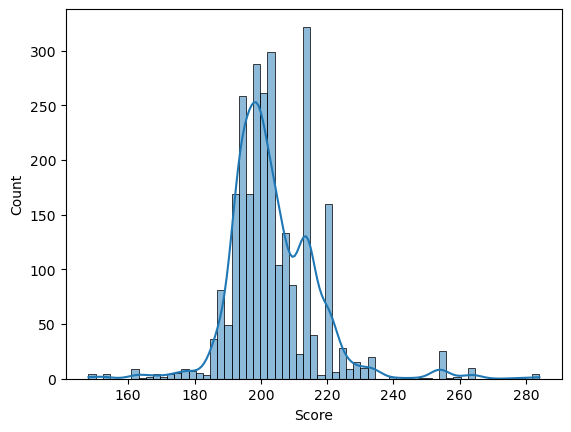

In [205]:
# Distribution plot of predicted score
sns.histplot(x = train_points['Score'],
             kde = True)

### **Predict Score on Test Set**
---

In [206]:
raw_test = raw_test[best_model_params]

In [207]:
# Transform the raw values in X_train into points
test_points = transform_points(raw_data = raw_test,
                               points_map_dict = points_map_dict,
                               num_cols = best_model_params)

test_points.head()

,job,marital,education,default
1548,48.567394,56.151485,76.433154,51.300549
872,50.320065,56.151485,46.537617,51.300549
1675,46.580603,50.206230,52.399645,51.300549
3391,46.580603,50.206230,76.433154,51.300549
2862,50.320065,56.151485,55.958772,51.300549


In [208]:
# Calculate the total score
test_points['Score'] = test_points.sum(axis=1).astype(int)

<Axes: xlabel='Score', ylabel='Count'>

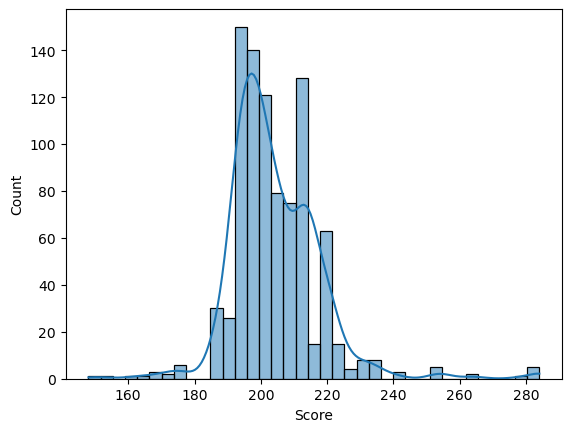

In [209]:
# Distribution plot of predicted score
sns.histplot(x = test_points['Score'],
             kde = True)

### **Setting Cut Off**
---

To set the cutoff score, we need information of:

- Expected approval rate from:
  - Most current applicant distribution — most recent month/quarter.

- Expected bad rate from:
  - Development sample, or
  - Most recent sample — use performance window for the scorecard.

Since we don't hace the most recent credit applications data, we will:
- Estimate the expected approval rate from the test set.
- Estimate the expected bad rate from the train set.


### **Estimate the Expected Approval Rate**
---

In [210]:
# Initialize empty lists to store cutoff 
cutoff_list = []
approval_rate_list = []

for cutoff in range(int(min_score), int(max_score)):

    # Append the current cutoff value to the cutoff list
    cutoff_list.append(cutoff)

    # Calculate the number of approvals for scores greater than or equal to the current cutoff
    approve_counts = len(train_points[train_points['Score'] >= cutoff])

    # Calculate the total number of samples
    n_sample = len(train_points)

    # Calculate the approval rate for the current cutoff
    approval_rate = approve_counts / n_sample

    # Append the approval rate to the approval rate list
    approval_rate_list.append(approval_rate)

# Create a DataFrame to store the cutoff values and corresponding approval rates
approval_rate_table = pd.DataFrame({'Cutoff': cutoff_list,
                                    'Expected Approval Rate': approval_rate_list})

# Display the approval rate table
approval_rate_table

,Cutoff,Expected Approval Rate
0,156,0.997013
1,157,0.997013
2,158,0.997013
3,159,0.997013
4,160,0.997013
...,...,...
123,279,0.001494
124,280,0.001494
125,281,0.001494
126,282,0.001494


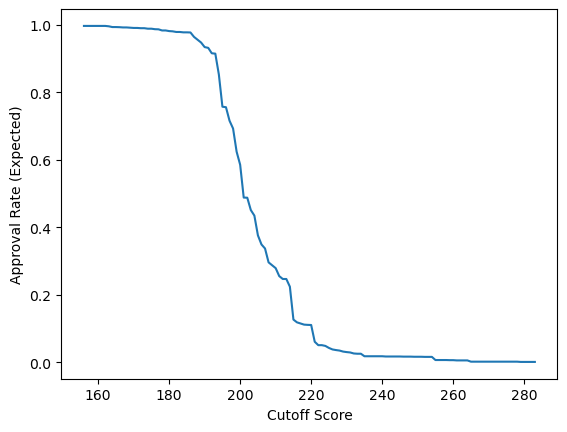

In [211]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

plt.xlabel('Cutoff Score')
plt.ylabel('Approval Rate (Expected)')
plt.show()

### **Estimate the Expected Bad Rate**
---

In [212]:
# Initialize empty lists 
cutoff_list = []
bad_rate_list = []

# Iterate over a range of cutoff values (from the minimum score to the maximum score)
for cutoff in range(int(min_score), int(max_score)):

    # Append the current cutoff value to the cutoff list
    cutoff_list.append(cutoff)

    # Calculate the number of bad samples (scores less than the current cutoff)
    bad_counts = len(train_points[train_points['Score'] < cutoff])

    # Calculate the total number of samples
    n_sample = len(train_points)

    # Calculate the bad rate for the current cutoff
    bad_rate = bad_counts / n_sample

    # Append the bad rate to the bad rate list
    bad_rate_list.append(bad_rate)

# Create a DataFrame to store the cutoff values and corresponding bad rates
bad_rate_table = pd.DataFrame({'Cutoff': cutoff_list,
                               'Expected Bad Rate': bad_rate_list})

# Display the bad rate table
bad_rate_table

,Cutoff,Expected Bad Rate
0,156,0.002987
1,157,0.002987
2,158,0.002987
3,159,0.002987
4,160,0.002987
...,...,...
123,279,0.998506
124,280,0.998506
125,281,0.998506
126,282,0.998506


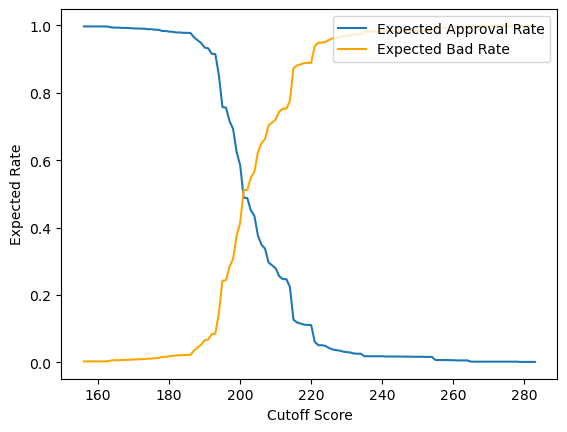

In [213]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

# Plot the expected bad rate
plt.plot(bad_rate_table['Cutoff'],
         bad_rate_table['Expected Bad Rate'],
         label = "Expected Bad Rate",
         color = 'orange')

plt.ylabel("Expected Rate")
plt.xlabel("Cutoff Score")
plt.legend(loc = 1)
plt.show()

Which cutoff will we choose?

we choose in 200 Cutoff

Re-Predict with 200 credit score as cutoff

In [215]:
input_table

,default,job,marital,education
0,yes,entrepreneur,single,secondary


In [214]:
input_score = predict_score(raw_data = input_table,
                            cutoff_score = 200)

Credit Score :  169
Recommendation : REJECT
